In [5]:
%matplotlib inline

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

import statsmodels.api as sm
norms = sm.robust.norms
from wotan import flatten

In [353]:
try:
    long_df = pd.read_csv('./Training_Data/sclerochronology_training_8.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [10]:
try:
    df = pd.read_csv('./Training_Data/training_tree_1.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [3]:
try:
    df = pd.read_csv('./Training_Data/no_match_test_data.csv', index_col=0)
except FileNotFoundError:
    print("File not found. Please check the file is in the current working directory and has been spelt correctly")
except pd.errors.EmptyDataError:
    print("No data.")
except pd.errors.ParserError:
    print("Parse error.")
except Exception:
    print("An error occured.")

In [9]:
df.head()

,master_chronology,SLC08A
year,,
1630,2.235870,NaN
1631,1.132329,NaN
1632,-0.841564,NaN
1633,-0.130124,NaN
1634,1.247763,NaN


In [177]:
long_df.head()
long_df.shape

(366, 58)

In [178]:
df_master = long_df.iloc[:, : 20]
df_master.shape
df_master.head()
#df_master.tail()
#print(1995-1630)

,SLC01A,SLC01B,SLC02A,SLC02B,SLC03A,SLC03B,SLC04A,SLC04B,SLC05A,SLC05B,SLC06A,SLC06B,SLC07A,SLC07B,SLC08A,SLC08B,SLC09A,SLC09B,SLC11C,SLC13A
year,,,,,,,,,,,,,,,,,,,,
1630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [443]:
def rename_dataframe(df):

    assert len(df.columns) == 2, "Dataframe does not contain 2 columns please reenter a new csv in the correct form."
    column = list(df.columns)
    print(column)
    df = df.rename({column[0]: "master_chronology", column[1]: "sample"}, axis = 1)
    return df


In [444]:
rename_dataframe(df)

['master_chronology1', '61257']


,master_chronology,sample
year,,
649,1.936838,NaN
650,1.605328,NaN
651,1.079118,NaN
652,0.424857,NaN
653,-0.415379,NaN
...,...,...
2001,1.657925,1.802389
2002,1.434835,1.250185
2003,0.682095,NaN


In [179]:
dendro = df_master.to_numpy()

print(dendro.shape)
print(dendro[0])
averaging = []
for i in range(dendro.shape[0]):
    name = str("average" + str(i))
    name = dendro[i]
    averaging.append(dendro[i])
    i += 1

def biweight_mean(list):
    x_star = np.mean(list[0])
    x = list
    u_vals = []
    w_vals = []
    
    c = 4.685
    for i in range(x):
        u_vals = (x[i]-x_star/np.median(np.absolute(x - np.median(x))))
        if np.absolute(u_vals<=c):
            w_vals = (1-(u_vals/c)**2)
        else:
            w_vals = (0)
    biweight = (np.sum(w_vals)*np.sum(x)/np.sum(w_vals))
    x_star = biweight
    return biweight

(366, 20)
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


In [180]:
master_chronology = []
for i in range(len(averaging)):
    biweight = biweight_mean(averaging[i])
    master_chronology.append(biweight)
    

print(master_chronology)
print(len(master_chronology))

TypeError: only integer scalar arrays can be converted to a scalar index

In [181]:
df_master.head()

,SLC01A,SLC01B,SLC02A,SLC02B,SLC03A,SLC03B,SLC04A,SLC04B,SLC05A,SLC05B,SLC06A,SLC06B,SLC07A,SLC07B,SLC08A,SLC08B,SLC09A,SLC09B,SLC11C,SLC13A
year,,,,,,,,,,,,,,,,,,,,
1630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1631,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [381]:
df.head()

,master_chronology1,61251,Algined,Algined2,Large_Algined
year,,,,,
649,1.936838,NaN,NaN,NaN,NaN
650,1.605328,NaN,NaN,NaN,NaN
651,1.079118,NaN,NaN,NaN,NaN
652,0.424857,NaN,NaN,NaN,NaN
653,-0.415379,NaN,NaN,NaN,NaN


In [6]:
samples = []
i= 0
for col in df.columns:
    col_list = df[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples.append(cleanedList)
print(samples)
print(len(samples))
print(len(samples[1]))  


[[2.235869998, 1.132328703, -0.841564282, -0.130123647, 1.247762822, 1.638606085, 0.222738524, 1.203137934, 2.055554049, 1.195772282, 1.715856875, 1.386419714, 1.509306738, -0.36778324, -0.453077169, 0.771905572, 1.413592355, 0.820585831, 0.180248886, 0.715319634, 1.978084087, 0.935713879, 0.445541163, 0.877161519, 1.361232496, 2.339152265, 0.566461604, 1.53362851, 0.540780673, 0.308551136, 2.044395312, 1.47138373, 1.475049439, 1.691701112, 0.900841121, 1.267905212, -0.014071594, 0.910193182, -0.400849161, -1.45354612, -0.294211864, -0.266837394, -0.088826567, 2.092952082, 3.398928031, 1.912562577, 0.278125187, 1.6785953, 0.074105503, 1.254530137, 2.259505324, 1.61886373, 1.334944069, 1.124796033, 1.078302631, -1.15032024, -0.055803224, 0.009875286, 0.298643013, 1.157698215, 1.808604723, 0.801203035, 1.338288809, 1.158238639, 1.151479022, 2.438930843, 0.05858434, 1.263130567, 1.203910163, 0.763167973, 0.294965051, 1.777691384, 1.613658193, 0.954481904, 0.38777415, 0.21942618, 0.1322443

# Testing the Heatmap criteria

In [262]:
testing = [samples[1], samples[1]]

In [263]:
test_segments = {}

size = 10
step = 1
length = len(testing)
for j in range(length):
    test_segments[j] = ([testing[j][i : i + size] for i in range(0, len(testing[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

test_short = []

for i in range(len(test_segments)):
    for j in range(len(test_segments[i])):
        if len(test_segments[i][j]) != 10:
            #print(segments[i][j])
            test_short.append(test_segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
test_segments0 = [x for x in test_segments[0] if x not in test_short]
test_segments1 = [x for x in test_segments[1] if x not in test_short]
    
#print(segments0)

test_segments[0] = test_segments0
test_segments[1] = test_segments1
test_segments[0][-1]
assert len(test_segments[0][-1]) == 10
assert len(test_segments[1][-1]) == 10
print(len(test_segments[0]))


54


In [264]:
test_master_segments = test_segments[0]
test_sample_segments = test_segments[1]
test_pairs =  [(x,y) for x in test_master_segments for y in test_sample_segments]
#print(pairs)

print(len(test_pairs))
print(test_pairs[0])

2916
([0.308936361, 1.924613236, -0.10128158, 2.605036373, 1.699304928, 0.027098646, 1.589876781, -1.040348953, 1.647385572, 0.193615986], [0.308936361, 1.924613236, -0.10128158, 2.605036373, 1.699304928, 0.027098646, 1.589876781, -1.040348953, 1.647385572, 0.193615986])


In [90]:
import scipy.stats
test_t_vals = {}
for i in range(len(test_pairs)):
    (test_seg1, test_seg2) = test_pairs[i]
    if len(test_seg1) == len(test_seg2) == 10:
        r = np.corrcoef(test_seg1, test_seg2)[1,0]
        n = min(len(test_seg1), len(test_seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        print(t)
        test_t_vals[str(i) + " " + str(t)] = (test_seg1, test_seg2)
    else: 
        print(test_seg1,test_seg2)
#print(t_vals)
print(len(test_t_vals))
#t_vals.keys()

NameError: name 'test_pairs' is not defined

In [266]:
test_values = list(test_t_vals.keys())
for i in range(len(test_values)):
    test_values[i] = float(test_values[i].split()[-1])
    
print(test_values)

print(len(test_values)/59)
n = 10
endlist = [[] for _ in range(n)]
for index, item in enumerate(test_values):
    endlist[index % n].append(item)
#print(endlist)

test_strides = [0]
length = int(len(test_values)//59)
for i in range(length):
    test_strides.append(59+i)
    i+=1

chronology = []
t_values_samples = []

for i in range(59):
    for j in range(len(test_strides)):
        chronology.append(test_values[test_strides[j]])
        j+=1
    test_strides = [x+1 for x in test_strides]
    t_values_samples.append(chronology)
    chronology = []
    i+=1
result = []
for i in range(len(t_values_samples)):
    result.append(sum(abs(float(number)) for number in t_values_samples[i]))
max_list = (max(result, key=abs))

print(result.index(max_list))

max_val = (max(t_values_samples[25], key=abs))
print(max_list)
print(max_val)
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(test_values)
mean = np.mean(test_values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(test_values)):
    if test_values[x] >= out_up or test_values[x] <= out_down: 
        outlying.append(test_values[x])
#print(outlying)


[134217727.99999999, -2.1070484476438534, 1.4095340224825572, -0.9212305081118082, -0.7155638216973129, 0.4753092368743968, -1.0442875195317587, 1.0070182639646599, -3.1554729903222865, 1.217701179396878, -0.902979503366478, 2.5319467906281554, 0.6008207836735129, -0.1324626784839791, 0.5439595851670306, -1.2537603441548006, 3.4723929356780867, -2.0008164816234135, 1.6051848969868512, -1.113144397812973, -0.14914712330752242, 0.18171496879865248, -1.2259692885207985, -0.6732041602674551, -0.3061623973700073, -0.09569509977607245, 1.2946942873556249, 0.4608107345550386, 0.299048077940178, 0.9940919648564213, -0.6416739431380867, -0.31853359386969193, 0.16784517604441918, 0.3891793862474689, 0.6990240054031963, -0.7537677992426257, -0.2042297225427625, -1.0795077375542752, -0.7510552215346123, -0.2767106966256732, -0.15723652348936085, 2.2122903729420305, 0.3852935291452723, 0.2770931381871599, -0.024087122649035172, -1.189379469845114, 0.03673097196873207, 0.060570070534898754, 0.838024

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [267]:
print(len(test_t_vals.keys()) / 59)
test_heatmap =np.array(np.split(np.array(test_values), 59, axis=0))
test_heatmap.shape

49.42372881355932


ValueError: array split does not result in an equal division

In [ ]:
sns.set(rc={'figure.figsize':(20,13)})
sns.heatmap(test_heatmap, cmap="YlGnBu", vmax= 3)
plt.show()

# Small Segment Statistical Method

In [91]:
#Helper method: Splitting an array into even sized chunks with a given overlap. (Using lists of lists and dictionaries.)

segments = {}

size = 10
step = 1
length = len(samples)
for j in range(length):
    segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != 10:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == 10
assert len(segments[1][-1]) == 10
print(len(segments[1]))

101


In [92]:
#Get every combination of the sample segment with the first master segement then moves onto the next one and so on
master_segments = segments[0]
sample_segments = segments[1]
pairs =  [(x,y) for x in master_segments for y in sample_segments]
#print(pairs)

print(len(pairs))
len(pairs) /42

36057


858.5

In [97]:
import scipy.stats
t_vals = {}
for i in range(len(pairs)):
    (seg1, seg2) = pairs[i]
    if len(seg1) == len(seg2) == 10:
        r = np.corrcoef(seg1, seg2)[1,0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        t_vals[t] = (seg1,seg2)
    else: 
        print(seg1,seg2)
#print(t_vals)
print(len(t_vals))
#t_vals.keys()

36057


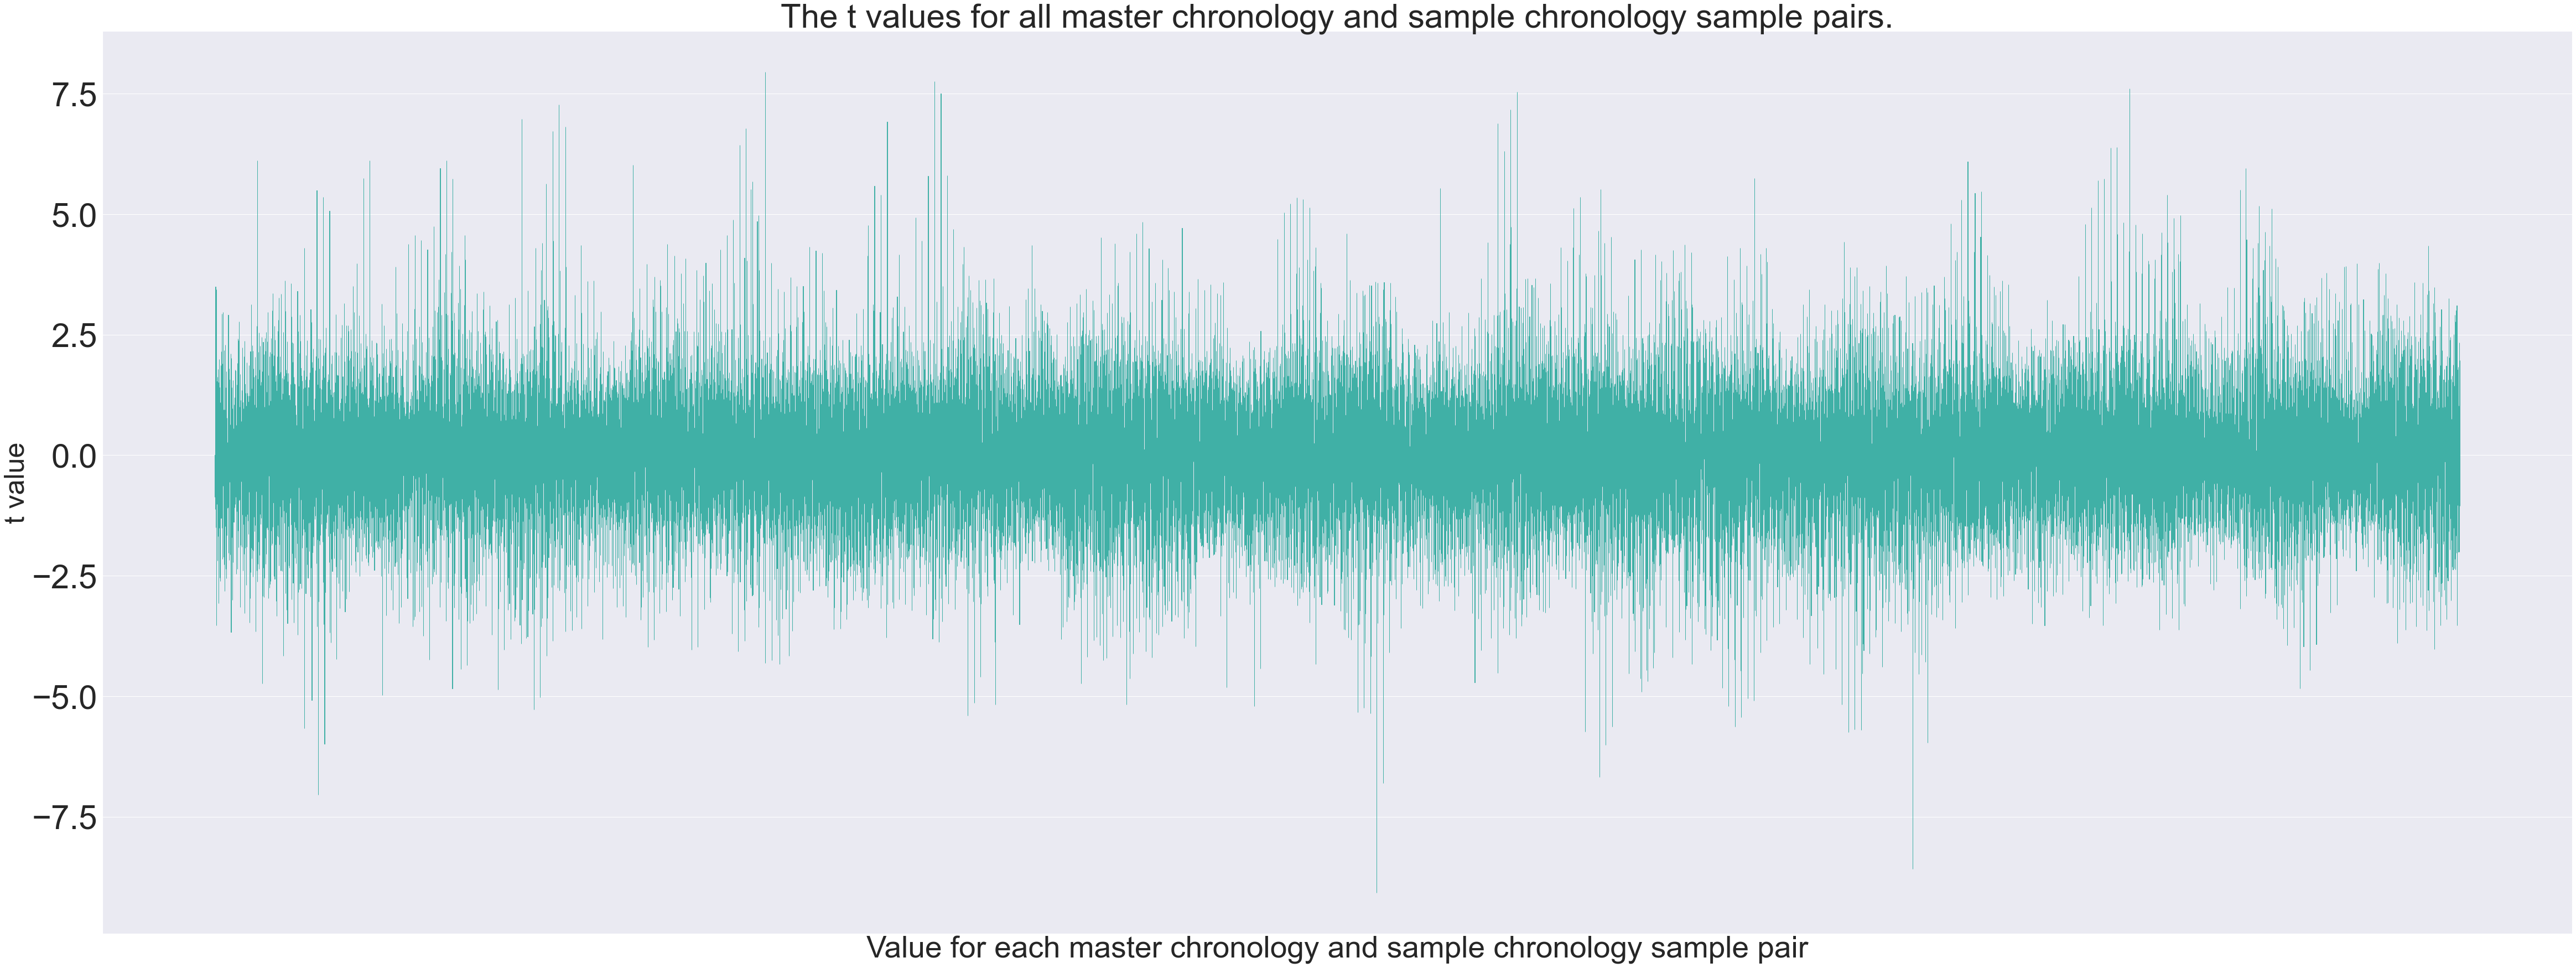

In [105]:
values = list(t_vals.keys())
sns.set(rc={'figure.figsize':(80,30)})
plt.bar( list(range(len(values))), values, color=["#40B0A6"],  edgecolor='#40B0A6')
plt.xticks([])
plt.yticks(fontsize=60)
plt.xlabel("Value for each master chronology and sample chronology sample pair", fontsize=55)
plt.ylabel("t value",fontsize=50)
plt.title("The t values for all master chronology and sample chronology sample pairs.",fontsize=60)
plt.show()

In [10]:
#print(outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe


values = list(t_vals.keys())
for i in range(len(values)):
    values[i] = float(values[i].split()[-1])


    
    
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])

stri = len(segments[1])+1
x=list(map(str,outlying))
z="-".join(x)
contender = []
stride = len(segments[1]) 

print(outlying)    
for y in range(len(outlying)):
    ind = values.index(outlying[y])

    if z.find(str(values[ind + stri])) != -1:
        if z.find(str(values[ind + stri + stri])) != -1:
            if z.find(str(values[ind + stri + stri + stri])) != -1:
                if z.find(str(values[ind + stri + stri + stri + stri])) != -1:
                    if z.find(str(values[ind + stri + stri + stri + stri + stri])) != -1:
                        if z.find(str(values[ind + stri + stri + stri + stri + stri + stri])) != -1:
                            if z.find(str(values[ind + stri + stri + stri + stri + stri + stri + stri])) != -1:
                                if z.find(str(values[ind + stri + stri + stri + stri + stri + stri + stri + stri])) != -1:
                                    contender.append(outlying[y])
                                    y+=1
                                else:
                                    y+=1
                            else:
                                y+=1
                        else:
                            y+=1
                    else:
                        y+=1        
                else:
                    y+=1
            else:
                y+=1
        else: 
            y+=1
    else:
        y+=1

print(len(outlying))  
print(len(contender))
print(contender)
    
max_outlying = (max(values, key=abs))
print(values.index(max_outlying))
max_outlying = str(str(values.index(max_outlying)) + ' ' + str(max_outlying))
print(max_outlying)
max_contender = (max(contender, key=abs))
print(max_contender)
max_contender = str(str(values.index(max_contender)) + ' ' + str(max_contender))
print(max_contender)
top_contenders = []
for i in range(3):
    max_contender = (max(contender, key=abs))
    contender.remove(max_contender)
    max_contender = str(values.index(max_contender)) + ' ' + str(max_contender)
    top_contenders.append(max_contender)
    i+=1
print(top_contenders)

[6.1109023213346925, -4.735801563074627, -4.161196982191066, -3.7287162035927057, 4.299153161622678, -5.672283438566621, -5.079822648225627, 5.496808935532326, -7.042547005161926, 5.3536236583592824, -5.990539276391282, 5.064260185774355, -3.6778097301793595, -3.891449522829755, -4.229896748373299, 3.979290666232075, 5.7421632136432486, 6.110141739354393, -4.974674128063974, 3.9068524135460883, 4.376851965486706, 4.560208013862929, 4.460075477235607, -3.750652905893987, 4.260051021047361, -4.239662325349322, 4.750278474613727, 5.958103107557487, 4.1753227583267085, 6.116454900556219, 4.224181810060234, -4.842683475236386, 5.734784013389372, 3.937285255264339, -4.4370443306584075, 4.5622891621562705, 4.058951814396024, -4.360842624698087, -3.727877061610951, -4.861411441631679, -4.040355890445927, -3.8181671721115693, -3.9098855961134587, 6.974997040875831, -3.79126801809264, -3.765312540909579, -5.280893463456756, 4.301874018962635, -5.023558101051887, 3.842392104912445, 4.400912341307

In [ ]:
values = list(t_vals.keys())
for i in range(len(values)):
    values[i] = float(values[i].split()[-1])
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])

stri = 60
x=list(map(str,outlying))
z="-".join(x)
contender = []
stride = 59 
length_for_contenders = stride // 4
print(length_for_contenders)
strides = 0
contender_strides = []

for x in range(length_for_contenders):
    strides = strides + stri
    contender_strides.append(strides)
print(contender_strides)
for y in range(len(outlying)):
    ind = values.index(outlying[y])
    for i in range(14):
        if z.find(str(values[ind + contender_strides[i]])) == -1:
            break
        contender.append(outlying[y])
        print(i)
        y+=1
print(len(contender))

In [95]:
print(len(t_vals.keys()) / 1348)
heatmap =np.array(np.split(np.array(values), 1348, axis=0))
heatmap.shape

26.748516320474778


ValueError: array split does not result in an equal division

In [96]:
sns.set(rc={'figure.figsize':(20,13)})
sns.heatmap(heatmap, cmap="YlGnBu")
plt.show()

NameError: name 'heatmap' is not defined

In [94]:
cols = ['red' if x < 68 else 'green' if 68 <= x < 136 else 'blue' if 136 <= x < 204 else 'yellow' if 204 <= x < 272 else 'red' if 272 <= x <340 else '']
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(values[:20000]))), values[:20000],  edgecolor='green')
plt.show()

TypeError: '<' not supported between instances of 'list' and 'int'

In [ ]:
cols = ['red' if x < 68 else 'green' if 68 <= x < 136 else 'blue' if 136 <= x < 204 else 'yellow' if 204 <= x < 272 else 'red' if 272 <= x <340 else '']
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(values[20000:40000]))), values[20000:40000],  edgecolor='green')
plt.show()

In [11]:
(master_seg, sample_seg) = t_vals[top_contenders[0]]
print(master_seg, sample_seg)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg[0]))
print(samples[0].index(master_seg[1]))
print(samples[1].index(sample_seg[0]))
print(samples[1].index(sample_seg[1]))


[0.379215038, 1.705598117, 1.607912239, 1.058099801, 0.895420436, -0.183998344, 1.268929541, 1.558093524, 1.317537453, -0.364800898] [-0.239544048, 1.535708533, 1.342882172, 0.833361183, 0.284543455, -0.146738062, 0.915265632, 1.449188057, 0.562935358, -0.731296011]
304
305
48
49


In [12]:
(master_seg1, sample_seg1) = t_vals[top_contenders[1]]
print(master_seg1, sample_seg1)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg1[0]))
print(samples[0].index(master_seg1[1]))
print(samples[1].index(sample_seg1[0]))
print(samples[1].index(sample_seg1[1]))


[1.994332073, 1.101050595, 0.379215038, 1.705598117, 1.607912239, 1.058099801, 0.895420436, -0.183998344, 1.268929541, 1.558093524] [2.075045074, 1.527289249, -0.239544048, 1.535708533, 1.342882172, 0.833361183, 0.284543455, -0.146738062, 0.915265632, 1.449188057]
302
303
46
47


In [13]:
(master_seg2, sample_seg2) = t_vals[top_contenders[2]]
print(master_seg2, sample_seg2)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg2[0]))
print(samples[0].index(master_seg2[1]))
print(samples[1].index(sample_seg2[0]))
print(samples[1].index(sample_seg2[1]))

[1.131062812, 1.994332073, 1.101050595, 0.379215038, 1.705598117, 1.607912239, 1.058099801, 0.895420436, -0.183998344, 1.268929541] [1.159047465, 2.075045074, 1.527289249, -0.239544048, 1.535708533, 1.342882172, 0.833361183, 0.284543455, -0.146738062, 0.915265632]
301
302
45
46


In [14]:
print(samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))
print(samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0]))
print(samples[0].index(master_seg2[0]) - samples[1].index(sample_seg2[0]))


256
256
256


In [16]:
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology"] == master_seg[0])
print(indices)

print(samples[1].index(sample_seg[0]))
start = indices[0]-samples[1].index(sample_seg[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
print(chronology)

df['Algined']= chronology


(array([304]),)
48
start [256]
Legth 110
Beginning 1630
Ending 1995
Padding 256
634
0
Deletion 0
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, No

In [319]:
indices = np.where(df["master_chronology1"] == master_seg1[0])
print(indices)
print(indices2)
print(samples[1].index(sample_seg1[0]))
start = indices[0]-samples[1].index(sample_seg1[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
print(chronology)

df['Algined1']= chronology


(array([894]),)


NameError: name 'indices2' is not defined

In [347]:
indices = np.where(df["master_chronology1"] == master_seg2[0])


print(samples[1].index(sample_seg2[0]))
start = indices[0]-samples[1].index(sample_seg2[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
print(chronology)

df['Algined2']= chronology


9
start [210]
Legth 51
Beginning 649
Ending 2005
Padding 210
634
1096
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None,

<Axes: xlabel='year'>

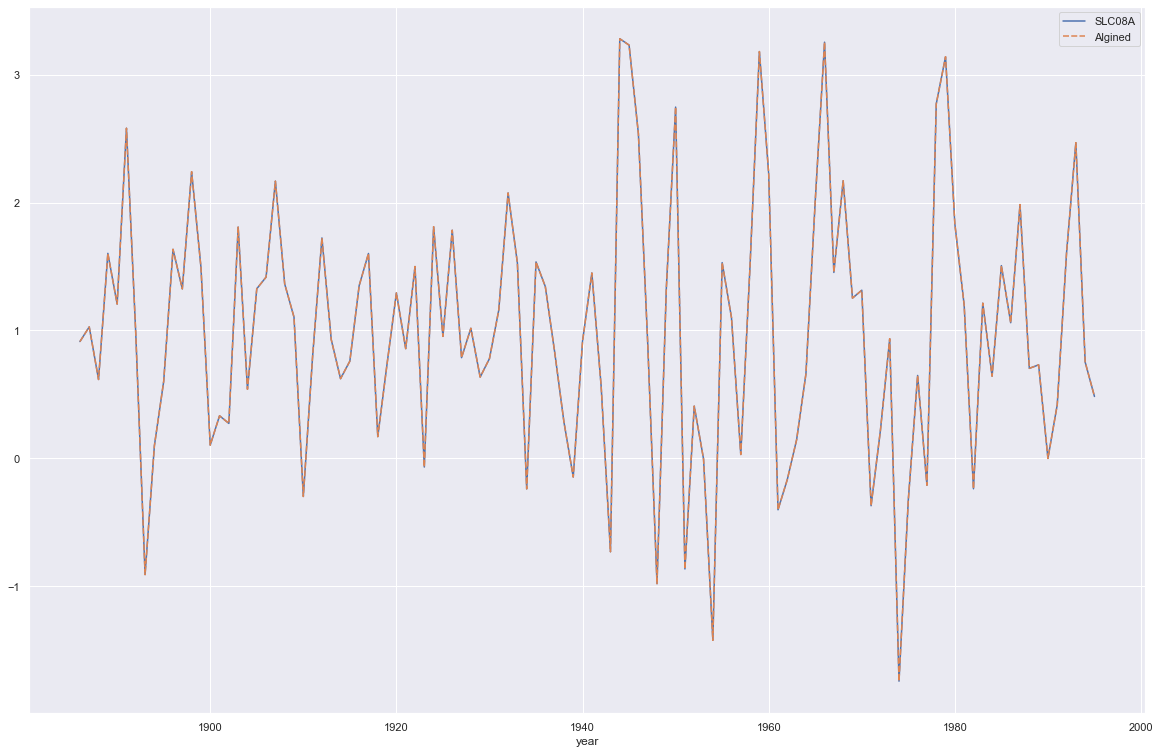

In [17]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["SLC08A",'Algined']])

<AxesSubplot:xlabel='year'>

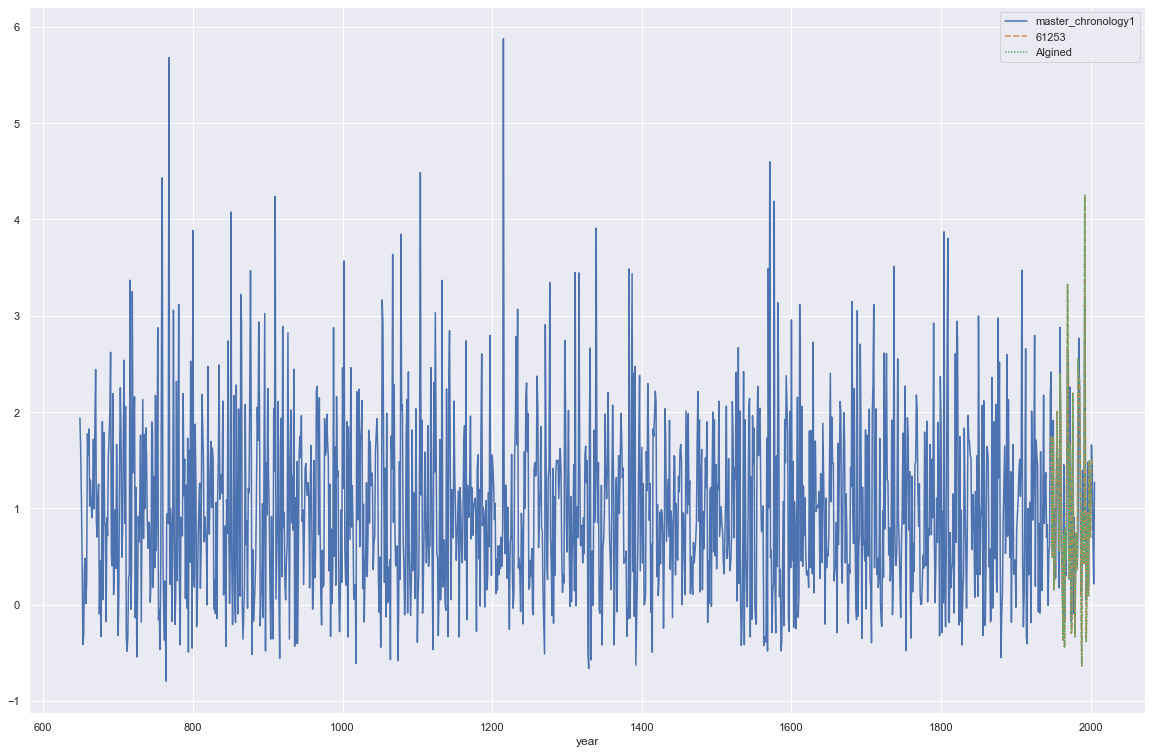

In [378]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["master_chronology1","61253",'Algined']])

# Large Sections Statistical method

In [369]:
large_segments = {}

size = len(samples[1])
step = 1
length = len(samples)
for j in range(length):
    large_segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1


for i in range(len(large_segments)):
    for j in range(len(large_segments[i][j])):
        if len(large_segments[i][j]) != size:
            print(large_segments[i][j])
            large_segments[i][j].delete()
            j+=1
    i+=1
    


In [370]:
master_segments1 = large_segments[0]
sample_segments1 = large_segments[1]
large_pairs =  [(x,y) for x in master_segments1 for y in sample_segments1]
print(len(large_pairs))

69207


In [371]:
import scipy.stats
large_t_vals = {}
for i in range(len(large_pairs)):
    (seg1, seg2) = large_pairs[i]
    if len(seg1) == len(seg2) == len(samples[1]):
        r = scipy.stats.pearsonr(seg1, seg2)[0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        large_t_vals[t] = (seg1,seg2)
print(len(large_pairs))
print(len(large_t_vals))
large_t_vals.keys()

69207
1307


dict_keys([0.4841641780117873, -1.2718801654899783, 0.8895101716997086, 1.5315879619389297, 0.5480330845375504, 0.9266239593413331, 0.3730311726399163, -0.037883359153204475, 0.19322751137015468, -0.42764665292474974, -1.744938726586622, -0.8262959488577605, -1.7317223120946628, -0.703494026315015, 1.9137788216041784, 1.1611836723037154, -0.29804654455030044, 0.1963129707017325, -2.563933419370817, 0.9459267072649629, 1.5713048010836557, 0.6472433147951517, 1.3301777633097467, -0.4564398684289566, -1.2460156450685704, 0.06541538040712433, 0.1926246895155103, -1.4697726743408102, 0.3610062399498754, -0.5677962854999264, -1.2372014249267649, 0.44710207992728385, 0.24390874209739072, 0.7133737278086306, 0.6988046251744615, -0.6673105181726652, 0.9162410239760822, 0.5518876317294558, -0.08219293267780371, 0.10496505093049306, 1.130579147153953, -0.3571198008789089, 0.08096650404525348, -1.087570744417426, -2.3021661932755157, 0.13671148302966124, 0.4573960012663285, -1.7652679797562143, 0.

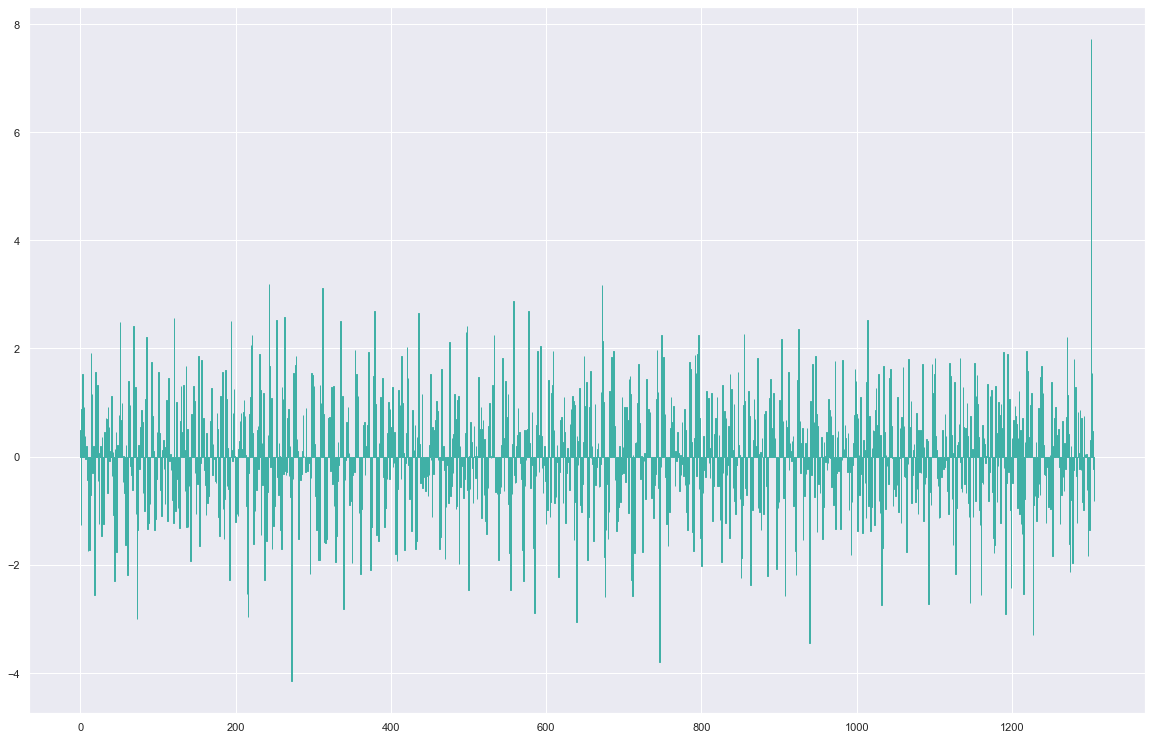

In [372]:
large_values = list(large_t_vals.keys())
sns.set(rc={'figure.figsize':(20,13)})
plt.bar( list(range(len(large_values))), large_values, color=["#40B0A6"],  edgecolor='#40B0A6')
plt.show()

In [373]:
n = len(samples[1])
endlist = [[] for _ in range(n)]
for index, item in enumerate(large_values):
    endlist[index % n].append(item)
print(endlist)

large_std = np.std(large_values)
large_mean = np.mean(large_values)
print(large_mean)
large_out_up = large_mean+2*large_std
print(large_out_up)
large_out_down = large_mean-2*large_std
print(large_out_down)
large_outlying = []
for x in range(len(large_values)):
    if large_values[x] >= large_out_up or large_values[x] <= large_out_down: 
        large_outlying.append(large_values[x])
print(large_outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe



large_max_outlying = (max(large_outlying, key=abs))
print(large_max_outlying)

[[0.4841641780117873, 2.481220434386138, 0.43272335973661724, -0.44507131716243997, 0.13366641763137133, -0.7147587049690285, -0.8771484173785604, 0.8055417170347794, -1.9204087618259393, 1.037999856819279, 0.19798847967698982, -0.4672565149512258, -0.5803339077942906, 0.9790281898965961, -1.7830210147361762, 0.027632387624658812, -0.5392799750123624, 0.3110793140197687, 0.38761859629090156, 0.39336152795864515, 0.16683462251424463, -0.8509185544698846, 0.4026790134210268, 0.19622903554575824, 0.9533240973477928, -2.1379603690231894], [-1.2718801654899783, 0.6749468516330389, -0.6134390921038378, -1.6500328870966885, 0.2851170613639201, 0.2574913911941956, -1.9031882079314666, 1.122312297759694, -0.5892828648218612, 0.8369151161040194, -0.7857667815234242, 0.19679504545949555, -0.743418844992709, -0.5168349084526406, 0.2542312705465667, -0.5433398016228136, 0.41169569844710047, 1.0629257655756323, -0.9111206079432986, -0.8932025118951757, 0.4882888627550636, -0.34109828013541516, -0.78

In [374]:
(master_seg1, sample_seg1) = large_t_vals[large_max_outlying]
print(master_seg1, sample_seg1)
#Would need to check both lists are sequential for the entire segment 
print(samples[0].index(master_seg1[0]))
print(samples[0].index(master_seg1[1]))
print(samples[1].index(sample_seg1[0]))
print(samples[1].index(sample_seg1[1]))


[0.157856264, 0.994870381, 0.27149899, 1.226489039, 1.597437024, 1.475668069, 0.509919073, 0.17176143, 2.878813758, 1.53605392, 0.58913451, 0.282591306, -0.177122377, 1.452272042, -0.189524253, 0.762222409, 0.299306232, 0.855830851, 2.643632999, 2.528113969, 0.534313446, 2.25967243, 1.26976055, -0.174321338, 0.7574617, 1.88252025, -0.093678678, 0.900529967, -0.303256613, 0.642253076, 0.361474848, 0.372973326, 0.806538715, 2.766661367, 2.254032845, 1.282305812, 0.104664617, 0.166462045, 1.394677935, 1.20175918, 0.810010639, 3.20048871, 1.00000635, 0.051581377, 0.389166981, 1.475974643, 0.185010428, 1.322578743, 0.971332156, 1.034463934, 1.657925393] [0.310220392, 0.928430957, 0.684413175, 1.854692208, 1.946739808, 0.840538477, 0.541679722, 0.408186869, 3.566220902, 0.735574015, 0.630536811, 1.237153945, -0.433130503, 0.304567569, -0.472558446, 1.965059237, 1.099138998, 1.878328707, 3.109796302, 2.587584637, 0.179257109, 0.570400002, 0.86565129, -0.584546651, 0.149857428, 2.059977802, 0.

In [375]:
samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0])


1302

In [376]:
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology1"] == master_seg1[0])

print(indices)

print(samples[1].index(sample_seg1[0]))
start = indices[0]-samples[1].index(sample_seg1[0])
print("start",start)
print("Legth",len(samples[1]))
beginning = df.index[0]
print("Beginning",beginning)
ending = df.index[-1]
print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
print("Padding",padding)
print(1283-649)
print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
    
#if len(chronology) > (ending-beginning):
   # print("Length", (ending-beginning))
    #deletion = int(len(chronology)-(ending-beginning))
   # print("Deletion", deletion)
    #for x in range(deletion-1):
      #  chronology.pop()
       # x+=1
print(chronology)

df['Large_Algined']= chronology


(array([1302]),)
0
start [1302]
Legth 51
Beginning 649
Ending 2005
Padding 1302
634
4
[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, N

In [378]:
df.head()

,master_chronology1,61251,Algined,Algined2,Large_Algined
year,,,,,
649,1.936838,NaN,NaN,NaN,NaN
650,1.605328,NaN,NaN,NaN,NaN
651,1.079118,NaN,NaN,NaN,NaN
652,0.424857,NaN,NaN,NaN,NaN
653,-0.415379,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='year'>

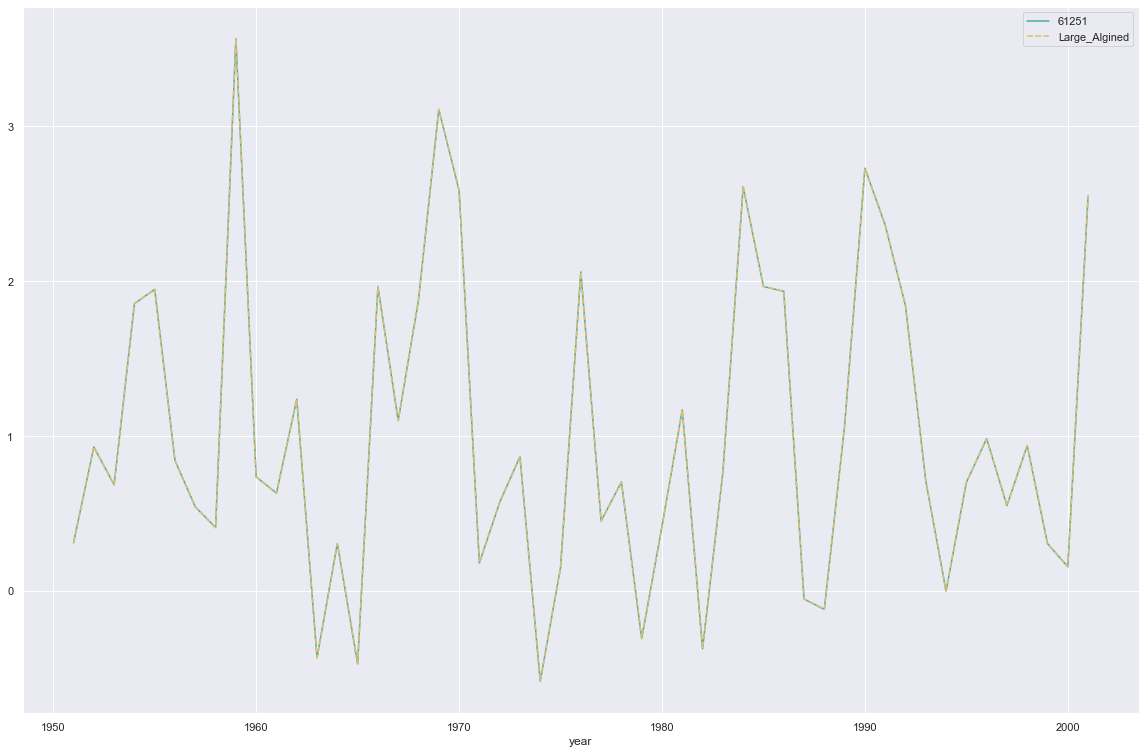

In [379]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["61251",'Large_Algined']], palette=["#40B0A6","#E1BE6A"])

In [413]:
sns.set_style('whitegrid')

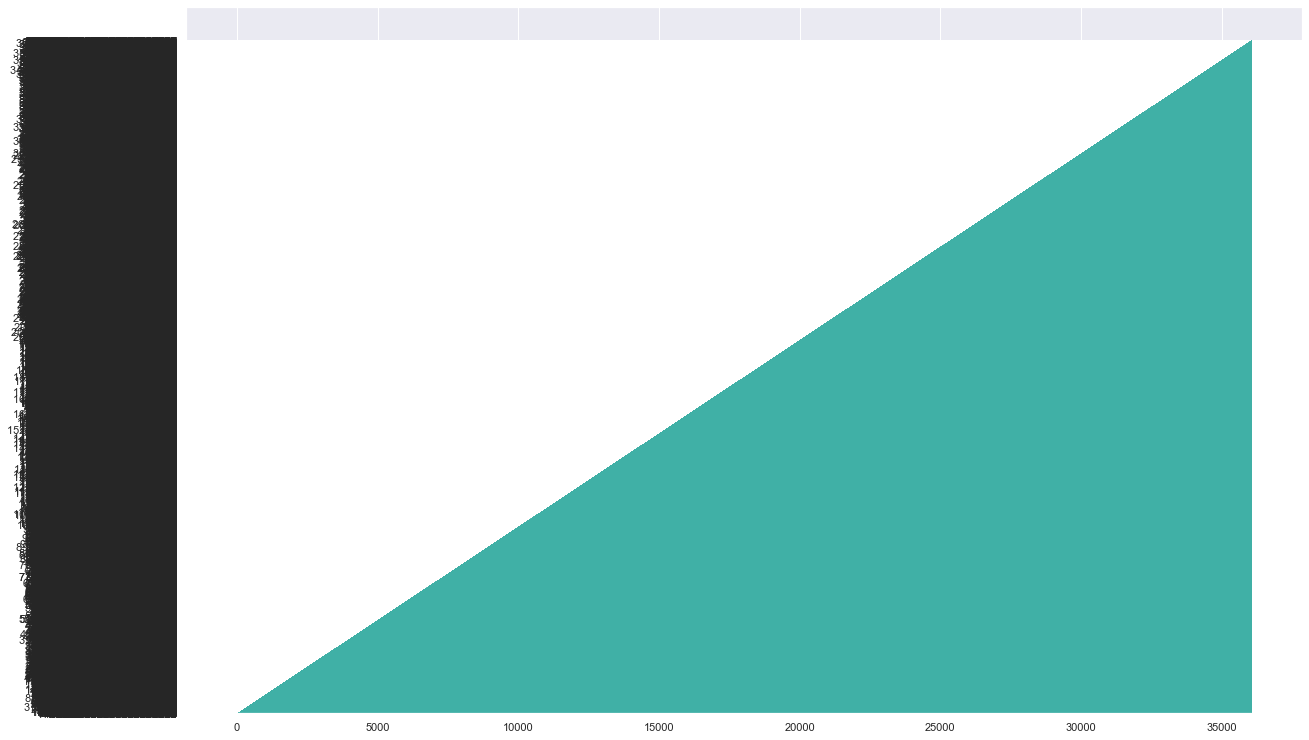

In [89]:
values = list(t_vals.keys())
sns.set(rc={'figure.figsize':(20,13)})
plt.bar(list(range(len(values))), values, color=["#40B0A6"],  edgecolor='#40B0A6')
plt.show()

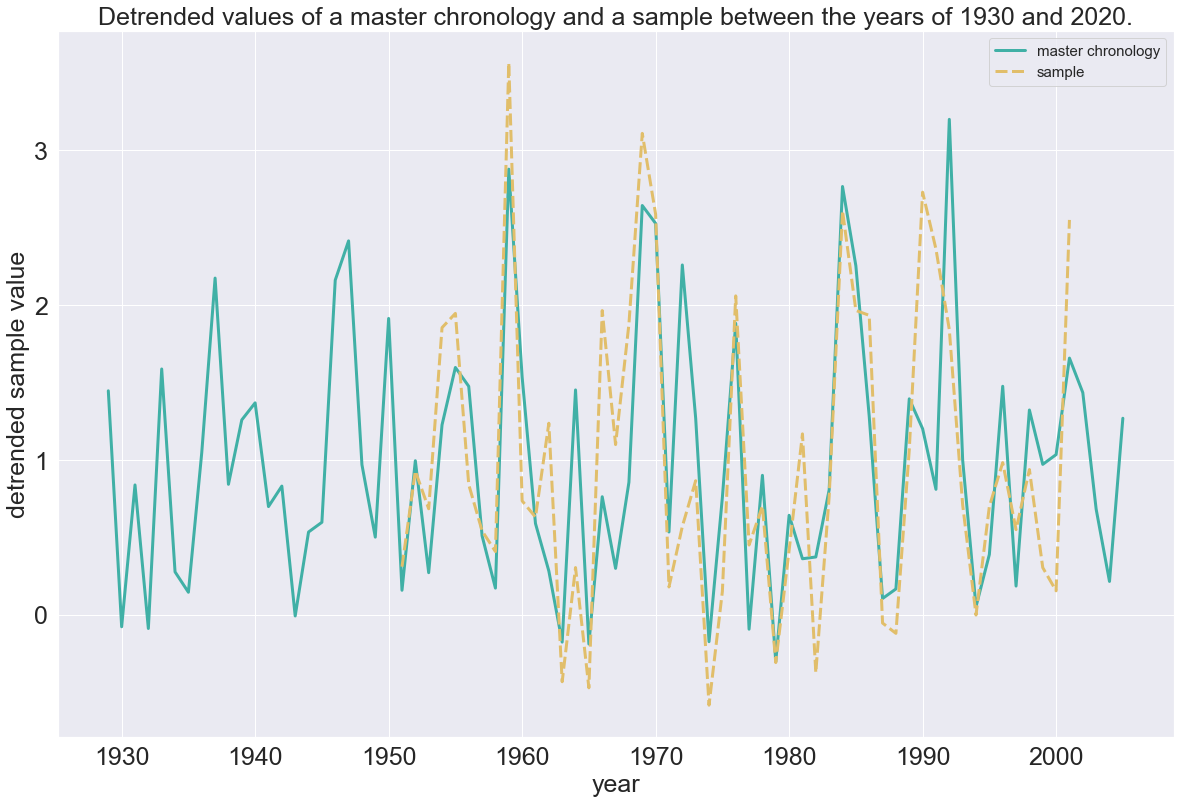

In [420]:
sns.set(rc={'figure.figsize':(20,13)})
sns.lineplot(data=df[["master_chronology1","61251"]].iloc[1280:],palette=["#40B0A6","#E1BE6A"], linewidth=3)
plt.legend(['master chronology', 'sample'], fontsize=15)
plt.ylabel('detrended sample value', fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.xlabel('year', fontsize=25)
plt.title("Detrended values of a master chronology and a sample between the years of 1930 and 2020.", fontsize=25)

plt.savefig('master_sample1.png')

# Experiments with variables

In [11]:
#Helper method: Splitting an array into even sized chunks with a given overlap. (Using lists of lists and dictionaries.)

segments = {}

size = 5
step = 1
length = len(samples)
for j in range(length):
    segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != size:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == size
assert len(segments[1][-1]) == size
print(len(segments[1]))
master_segments = segments[0]
sample_segments = segments[1]
pairs =  [(x,y) for x in master_segments for y in sample_segments]

import scipy.stats
t_vals = {}
for i in range(len(pairs)):
    (seg1, seg2) = pairs[i]
    if len(seg1) == len(seg2) == size:
        r = np.corrcoef(seg1, seg2)[1,0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        t_vals[str(i) + " " + str(t)] = (seg1,seg2)
    else: 
        print(seg1,seg2)
#print(t_vals)
#print(len(t_vals))
#t_vals.keys()

#print(outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe


values = list(t_vals.keys())
for i in range(len(values)):
    values[i] = float(values[i].split()[-1])

#print(max_list)
#print(max_val)
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+3*std
#print(out_up)
out_down = mean-3*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])

stri = len(segments[1])+1
x=list(map(str,outlying))
z="-".join(x)
contender = []
stride = len(segments[1]) 

print("outlying",len(outlying)) 

for y in range(len(outlying)):
    try:
        
        
        contender.append(outlying[y])
    except:
        continue 

winners = outlying.copy()

for y in range(len(outlying)):
    try:
        ind = values.index(outlying[y])
        s = ind + stri
        for i in range(7):
            if z.find(str(values[s])) == -1:
                winners.remove(outlying[y])
                continue
            else:
                s += stri
    except:
        continue
            

print(len(outlying))  
print("contender", len(contender))
print("winners", len(winners))
#print(contender)
    
max_outlying = (max(values, key=abs))
#print(values.index(max_outlying))
max_outlying = str(str(values.index(max_outlying)) + ' ' + str(max_outlying))
#print(max_outlying)
max_contender = (max(contender, key=abs))
#print(max_contender)
max_contender = str(str(values.index(max_contender)) + ' ' + str(max_contender))
#print(max_contender)
top_contenders = []
all_contenders = []
for i in range(3):
    max_contender = (max(contender, key=abs))
    contender.remove(max_contender)
    max_contender = str(values.index(max_contender)) + ' ' + str(max_contender)
    top_contenders.append(max_contender)
    i+=1
#print(top_contenders)
for i in range(len(winners)):
    all_contenders.append(str(values.index(winners[i])) + ' ' + str(winners[i]))
    
(master_seg, sample_seg) = t_vals[top_contenders[0]]
#print(master_seg, sample_seg)
#Would need to check both lists are sequential for the entire segment 
#print(samples[0].index(master_seg[0]))
#print(samples[0].index(master_seg[1]))
#print(samples[1].index(sample_seg[0]))
#print(samples[1].index(sample_seg[1]))

#print(samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))
#print(samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0]))
#print(samples[0].index(master_seg2[0]) - samples[1].index(sample_seg2[0]))

start_year = []
for i in range (len(all_contenders)):
    (master_seg, sample_seg) = t_vals[all_contenders[i]]
    start_year.append(samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))

from collections import Counter

start_year_dic = Counter(start_year)
start_year_count = len(start_year)
print(start_year_dic)
(master_seg, sample_seg) = t_vals[top_contenders[0]]
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology"] == master_seg[0])
#print(indices)

#print(samples[1].index(sample_seg[0]))
start = indices[0]-samples[1].index(sample_seg[0])
print("start",start)
print("Start year", start_year_dic.most_common(1)[0][0])
#print("Legth",len(samples[1]))
beginning = df.index[0]
#print("Beginning",beginning)
ending = df.index[-1]
#print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
#print("Padding",padding)
#print(1283-649)
#print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    #print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
#print(chronology)

df['Algined']= chronology


106
outlying 459
459
contender 459
winners 2
Counter({347: 2})
start [105]
Start year 347


In [213]:
samples = []
i= 0
for col in df.columns:
    col_list = df[col].tolist()
    cleanedList = [x for x in col_list if x == x]
    samples.append(cleanedList)
#print(samples)
#print(len(samples))
#print(len(samples[1]))  
segments = {}

size = 10
step = 1
length = len(samples)
for j in range(length):
    segments[j] = ([samples[j][i : i + size] for i in range(0, len(samples[j]), step)])
    j+=1
#print(segments[0])
#print(segments[1])

short = []

for i in range(len(segments)):
    for j in range(len(segments[i])):
        if len(segments[i][j]) != size:
            #print(segments[i][j])
            short.append(segments[i][j])
            j+=1
        else:
            continue
    i+=1

#print(short)
segments0 = [x for x in segments[0] if x not in short]
segments1 = [x for x in segments[1] if x not in short]
    
#print(segments0)

segments[0] = segments0
segments[1] = segments1
segments[0][-1]
assert len(segments[0][-1]) == size
assert len(segments[1][-1]) == size
print(len(segments[1]))
master_segments = segments[0]
sample_segments = segments[1]
pairs =  [(x,y) for x in master_segments for y in sample_segments]

import scipy.stats
t_vals = {}
for i in range(len(pairs)):
    (seg1, seg2) = pairs[i]
    if len(seg1) == len(seg2) == size:
        r = np.corrcoef(seg1, seg2)[1,0]
        n = min(len(seg1), len(seg2))
        t = (r * (np.sqrt(n - 2)) / (np.sqrt(1 - (r * r))))
        t_vals[str(i) + " " + str(t)] = (seg1,seg2)
    else: 
        print(seg1,seg2)
#print(t_vals)
#print(len(t_vals))
#t_vals.keys()

#print(outlying)

#Find the length of the list of pairs for the sample list
#Make sure all the lists of length less than 10 are deleted 
#Collect the t values with a loop using a gap of the list length + 1 and then adding one
#Find the highest 3 lists with the most consistant high t values
#Check these t values are actually statisically signinficant
#Add the padding and place the chronologies into the dataframe


values = list(t_vals.keys())
for i in range(len(values)):
    values[i] = float(values[i].split()[-1])

#print(max_list)
#print(max_val)
#print(t_values_samples)
#print(len(t_values_samples))
std = np.std(values)
mean = np.mean(values)
#print(mean)
out_up = mean+4*std
#print(out_up)
out_down = mean-4*std
#print(out_down)
outlying = []
for x in range(len(values)):
    if values[x] >= out_up or values[x] <= out_down: 
        outlying.append(values[x])

stri = len(segments[1])+1
x=list(map(str,outlying))
z="-".join(x)
contender = outlying.copy()
stride = len(segments[1]) 

#print(outlying) 

for y in range(len(outlying)):
    try:
        ind = values.index(outlying[y])
        s = ind + stri
        for i in range(8):
            #print(s)
            if z.find(str(values[s])) == -1:
                contender.remove(outlying[y])
                break
            else:
                s += stri
    except:
        continue
            


#print(len(outlying))  
print(len(contender))
print(contender)
for i in range(len(contender)):
    all_contenders.append(str(values.index(contender[i])) + ' ' + str(contender[i]))
max_outlying = (max(values, key=abs))
#print(values.index(max_outlying))
max_outlying = str(str(values.index(max_outlying)) + ' ' + str(max_outlying))
#print(max_outlying)
max_contender = (max(contender, key=abs))
#print(max_contender)
max_contender = str(str(values.index(max_contender)) + ' ' + str(max_contender))
#print(max_contender)
top_contenders = []
all_contenders = []
#for i in range(3):
#    max_contender = (max(contender, key=abs))
#    contender.remove(max_contender)
#    max_contender = str(values.index(max_contender)) + ' ' + str(max_contender)
#    top_contenders.append(max_contender)
#    i+=1
#print(top_contenders)
for i in range(len(contender)):
    all_contenders.append(str(values.index(contender[i])) + ' ' + str(contender[i]))
    
#(master_seg, sample_seg) = t_vals[top_contenders[0]]
#print(master_seg, sample_seg)
#Would need to check both lists are sequential for the entire segment 
#print(samples[0].index(master_seg[0]))
#print(samples[0].index(master_seg[1]))
#print(samples[1].index(sample_seg[0]))
#print(samples[1].index(sample_seg[1]))

#print(samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))
#print(samples[0].index(master_seg1[0]) - samples[1].index(sample_seg1[0]))
#print(samples[0].index(master_seg2[0]) - samples[1].index(sample_seg2[0]))

start_year = []
for i in range (len(all_contenders)):
    (master_seg, sample_seg) = t_vals[all_contenders[i]]
    start_year.append(df.first_valid_index() + samples[0].index(master_seg[0]) - samples[1].index(sample_seg[0]))

from collections import Counter

start_year_dic = Counter(start_year)
start_year_count = len(start_year)
print(start_year_dic)
print(start_year_count)
'''start_year_dic.most_common(3)
print(start_year_dic)
for i in range(len(start_year_dic.most_common(3))):
    print(i,"common",start_year_dic.most_common(3)[i][0])


#print(start_year_dic)
(master_seg, sample_seg) = t_vals[top_contenders[0]]
#Fix the padding issues (Think i may have cracked it)
#Need a way not to hard code the column names in 
indices = np.where(df["master_chronology"] == master_seg[0])
#print(indices)

#print(samples[1].index(sample_seg[0]))
start = indices[0]-samples[1].index(sample_seg[0])

#print("start",start)
#print("Legth",len(samples[1]))
beginning = df.index[0]
#print("Beginning",beginning)
ending = df.index[-1]
#print("Ending", ending)
padding = start[0]
padding_end = len(df.index) - (padding + len(samples[1])) 
#print("Padding",padding)
#print(1283-649)
#print(padding_end)
chronology = []
for i in range(padding):
    chronology.append(None)
    i+=1
for j in range(len(samples[1])):
    chronology.append(samples[1][j])
    j+=1
if padding_end > 0 :
    for k in range(padding_end):
        chronology.append(None)
        k+=1
else:
    deletion = int(len(chronology)-(ending-beginning))-1
    #print("Deletion", deletion)
    for x in range(deletion):
        chronology.pop()
        x+=1
#print(chronology)

df['Algined']= chronology'''

101
0
[]


ValueError: max() arg is an empty sequence

In [114]:
df.apply(pd.Series.first_valid_index)

master_chronology    1630
SLC08A               1886
Algined              1740
dtype: int64

Experimental data:

Changing the stride length for the contender list.

In [21]:
start_year_count = 0
start_year_dic = []

In [94]:
eight_stride_count = start_year_count
eight_stride_counter = start_year_dic

In [96]:
seven_stride_count = start_year_count
seven_stride_counter = start_year_dic

In [90]:
six_stride_count = start_year_count
six_stride_counter = start_year_dic

In [89]:
five_stride_count = start_year_count
five_stride_counter = start_year_dic

In [87]:
four_stride_count = start_year_count
four_stride_counter = start_year_dic 

In [85]:
three_stride_count = start_year_count
three_stride_counter = start_year_dic

In [83]:
two_stride_count = start_year_count
two_stride_counter = start_year_dic

In [81]:
one_stride_count = start_year_count
one_stride_counter = start_year_dic

In [79]:
zero_stride_count = start_year_count
zero_stride_counter = start_year_dic

Changing standard diviations for outliers for t values

In [135]:
three_standard_diviations = start_year_dic

In [141]:
four_standard_diviations = start_year_dic
print(four_standard_diviations)

Counter({1298: 6})


Different length samples

In [20]:
correct_count_sample_length = start_year_count
counter_sample_length = start_year_dic

In [138]:
correct_count_5_length = start_year_count
counter_sample_5_length = start_year_dic

In [140]:
correct_count_10_length = start_year_count
counter_sample_10_length = start_year_dic

In [142]:
correct_count_15_length = start_year_count
counter_sample_15_length = start_year_dic

In [144]:
correct_count_20_length = start_year_count
counter_sample_20_length = start_year_dic

In [146]:
correct_count_25_length = start_year_count
counter_sample_25_length = start_year_dic

In [148]:
correct_count_30_length = start_year_count
counter_sample_30_length = start_year_dic

In [150]:
correct_count_35_length = start_year_count
counter_sample_35_length = start_year_dic

In [152]:
correct_count_40_length = start_year_count
counter_sample_40_length = start_year_dic

In [86]:
print(counter_sample_40_length)

Counter({1886: 68, 1581: 17, 1627: 13, 1947: 7, 1666: 6, 1661: 6, 1665: 5, 1883: 4, 1668: 3, 1783: 2, 1919: 2, 1800: 1})


In [208]:
correct_count_1_dev = start_year_count
correct_count_1_dev = start_year_dic

In [210]:
counter_sample_2_dev = start_year_count
correct_count_2_dev = start_year_dic

In [212]:
counter_sample_3_dev = start_year_count
correct_count_3_dev = start_year_dic

In [164]:
counter_sample_4_dev = start_year_count
correct_count_4_dev = start_year_dic

In [166]:
counter_sample_5_dev = start_year_count
correct_count_5_dev = start_year_dic

In [ ]:
counter_sample_6_dev = start_year_count
correct_count_6_dev = start_year_dic

In [ ]:
counter_sample_7_dev = start_year_count
correct_count_7_dev = start_year_dic

In [ ]:
counter_sample_1_dev = start_year_count
correct_count_1_dev = start_year_dic

# print(eight_stride_counter)

<function matplotlib.pyplot.show(close=None, block=None)>

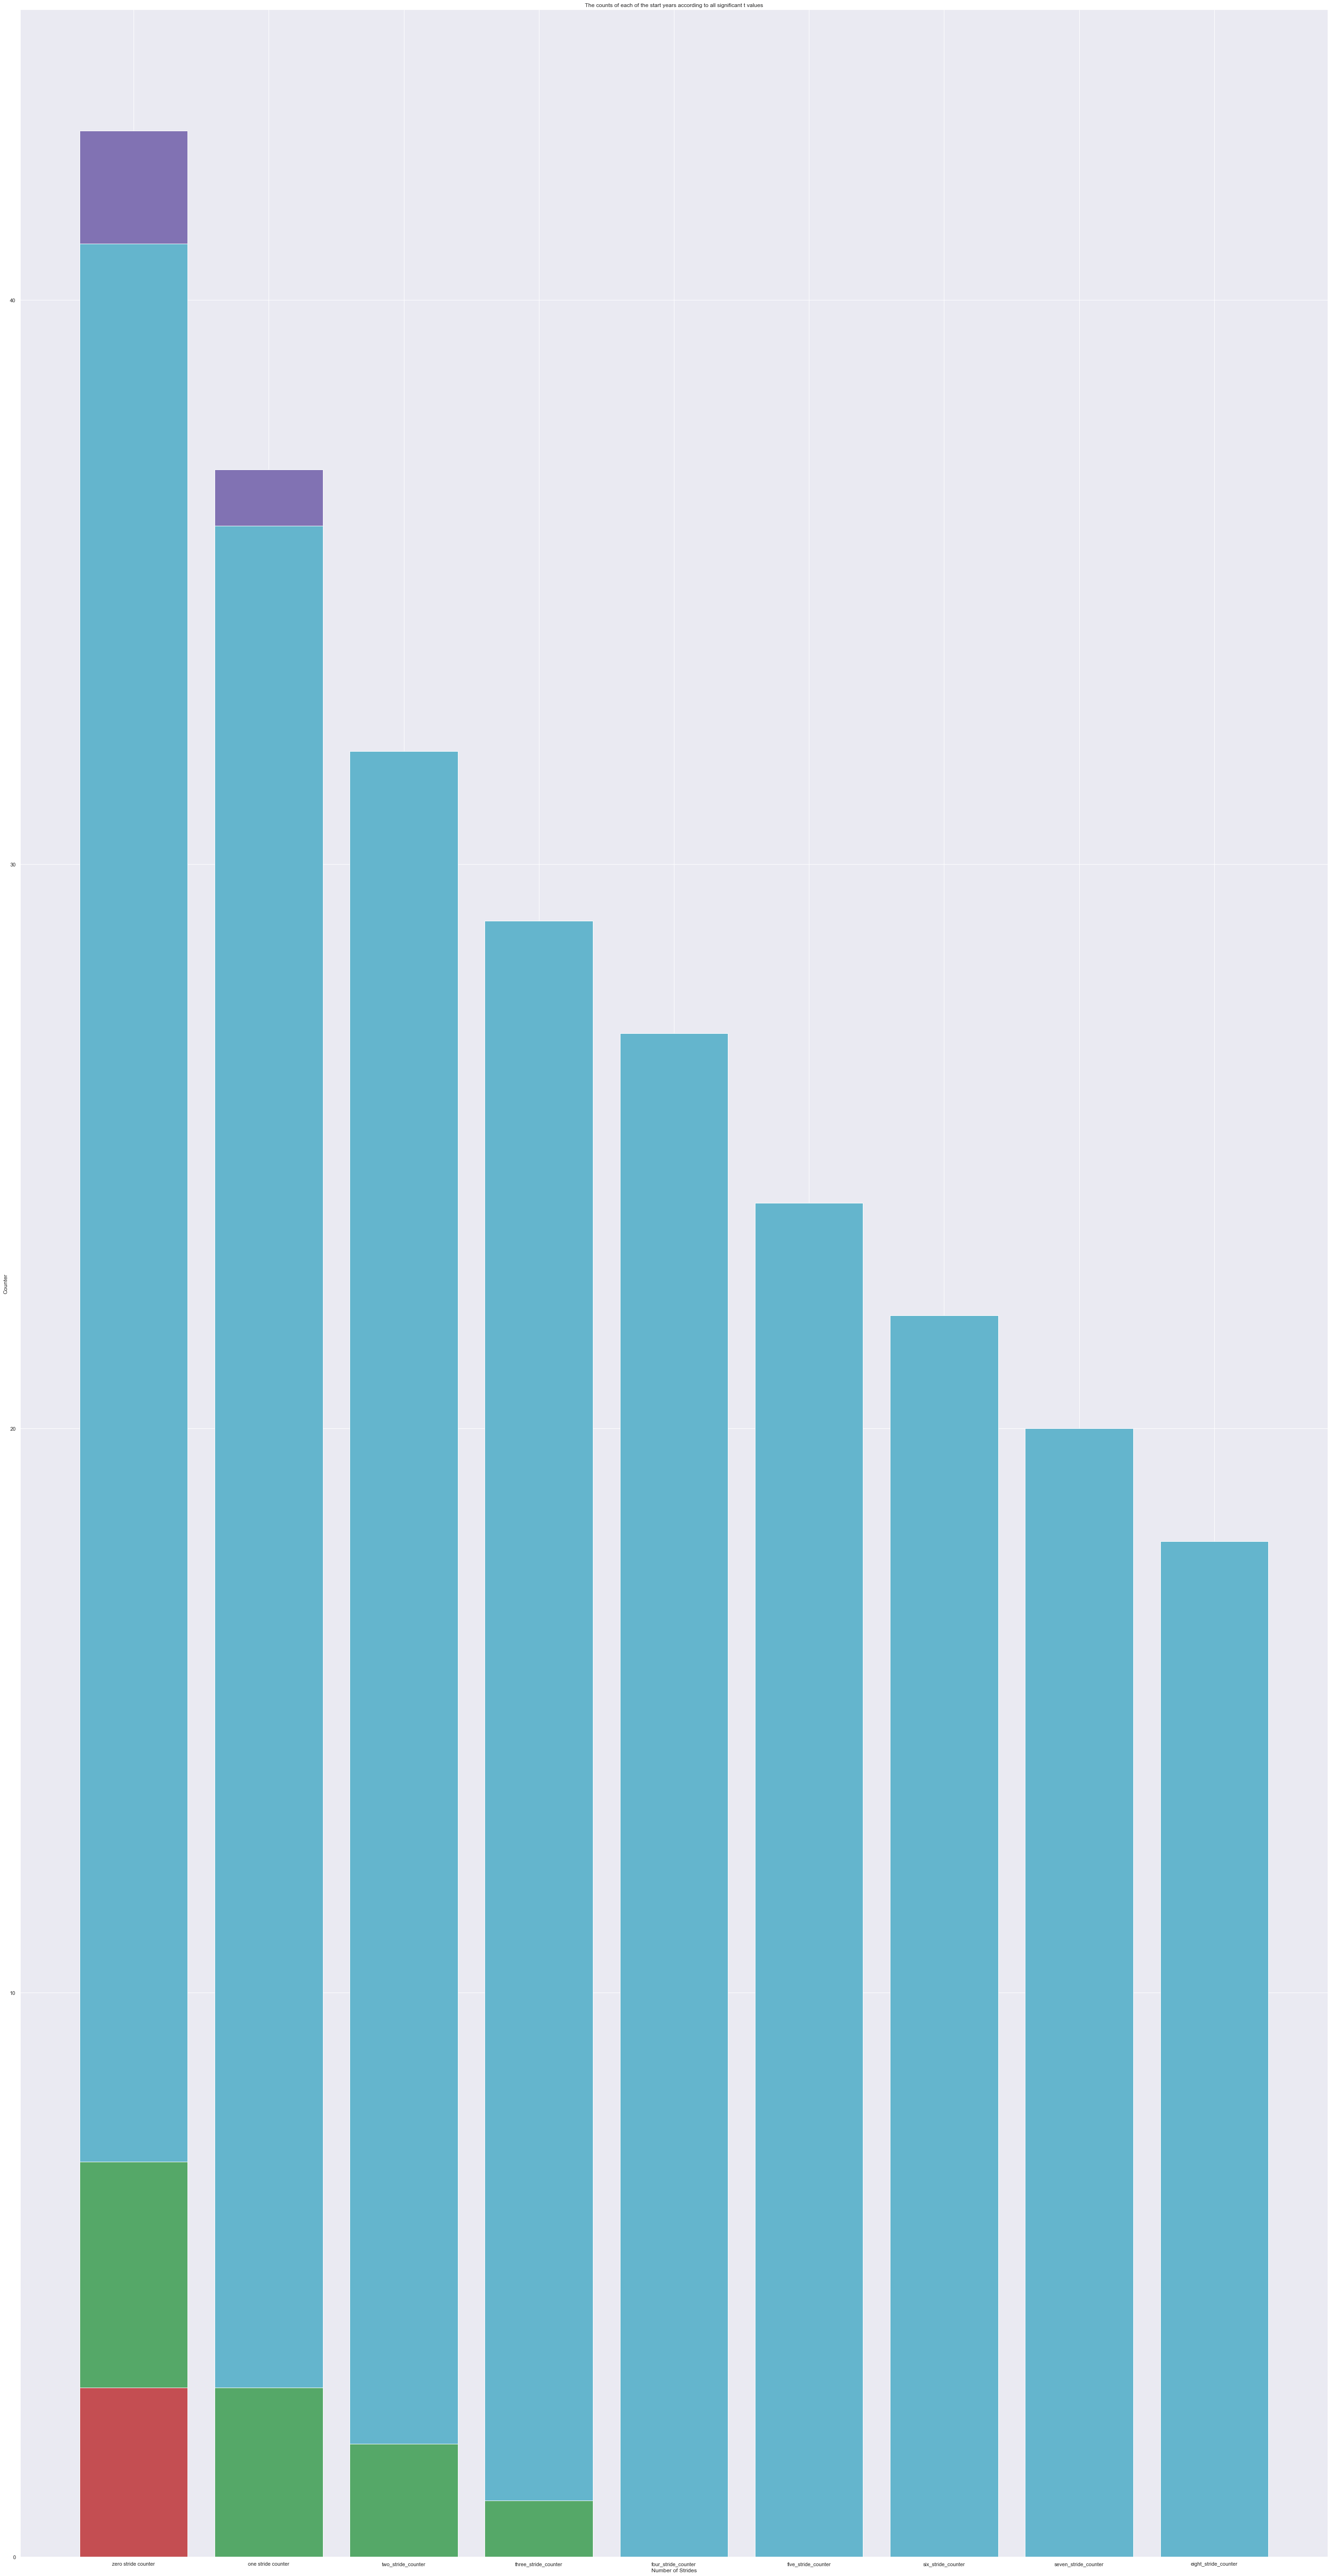

In [101]:
# create data
x = ['zero stride counter', 'one stride counter', 'two_stride_counter', 'three_stride_counter', 'four_stride_counter', 'five_stride_counter', 'six_stride_counter', 'seven_stride_counter', 'eight_stride_counter'  ]
y1 = np.array(zero_stride_counter.values())
y2 = np.array(one_stride_counter.values())
y3 = np.array(two_stride_counter.values())
y4 = np.array(three_stride_counter.values())
y5 = np.array(four_stride_counter.values())
 
    
#Need to get lists of each count 
legend_list = []
counter_list = []
for i in range(len(list(zero_stride_counter.values()))):
    legend_list.append(list(zero_stride_counter.keys())[i])
    
#for i in range(len(legend_list)):
    
# plot bars in stack manner
for i in range(len(legend_list)):
    counter_list.append([zero_stride_counter[legend_list[i]], one_stride_counter[legend_list[i]], two_stride_counter[legend_list[i]], three_stride_counter[legend_list[i]], four_stride_counter[legend_list[i]], five_stride_counter[legend_list[i]], six_stride_counter[legend_list[i]], seven_stride_counter[legend_list[i]], eight_stride_counter[legend_list[i]]])
    i+=1

correct = [zero_stride_counter[1298], one_stride_counter[1298], two_stride_counter[1298], three_stride_counter[1298], four_stride_counter[1298], five_stride_counter[1298], six_stride_counter[1298], seven_stride_counter[1298], eight_stride_counter[1298]]
total = [zero_stride_count, one_stride_count, two_stride_count, three_stride_count, four_stride_count, five_stride_count, six_stride_count, seven_stride_count, eight_stride_count]
incorrect = [element1 - element2 for (element1, element2) in zip(total, correct)]

plt.bar(x, counter_list[0], color='r')
plt.bar(x, counter_list[1], bottom= counter_list[0], color='b')

color_list = ['r', 'g', 'b', 'y', 'c', 'm']
beginning = counter_list[1]
for i in range(len(counter_list)-2):
    bottom_list = [x + y for x, y in zip(beginning, counter_list[i+1])]
    plt.bar(x, counter_list[i+2], bottom = bottom_list, color = color_list[i%6]) 
sns.set(rc={'figure.figsize':(50,100)})
plt.xlabel("Number of Strides")
plt.ylabel("Counter")



plt.title("The counts of each of the start years according to all significant t values")

plt.show


In [173]:
correct = [zero_stride_counter[1310], one_stride_counter[1310], two_stride_counter[1310], three_stride_counter[1310], four_stride_counter[1310], five_stride_counter[1310], six_stride_counter[1310], seven_stride_counter[1310], eight_stride_counter[1310]]
total = [zero_stride_count, one_stride_count, two_stride_count, three_stride_count, four_stride_count, five_stride_count, six_stride_count, seven_stride_count, eight_stride_count]
incorrect = [element1 - element2 for (element1, element2) in zip(total, correct)]

print(correct)
print(incorrect)
print(total)

[20, 16, 13, 11, 9, 7, 7, 6, 1]
[360, 155, 67, 26, 12, 5, 5, 1, 0]
[380, 171, 80, 37, 21, 12, 12, 7, 1]


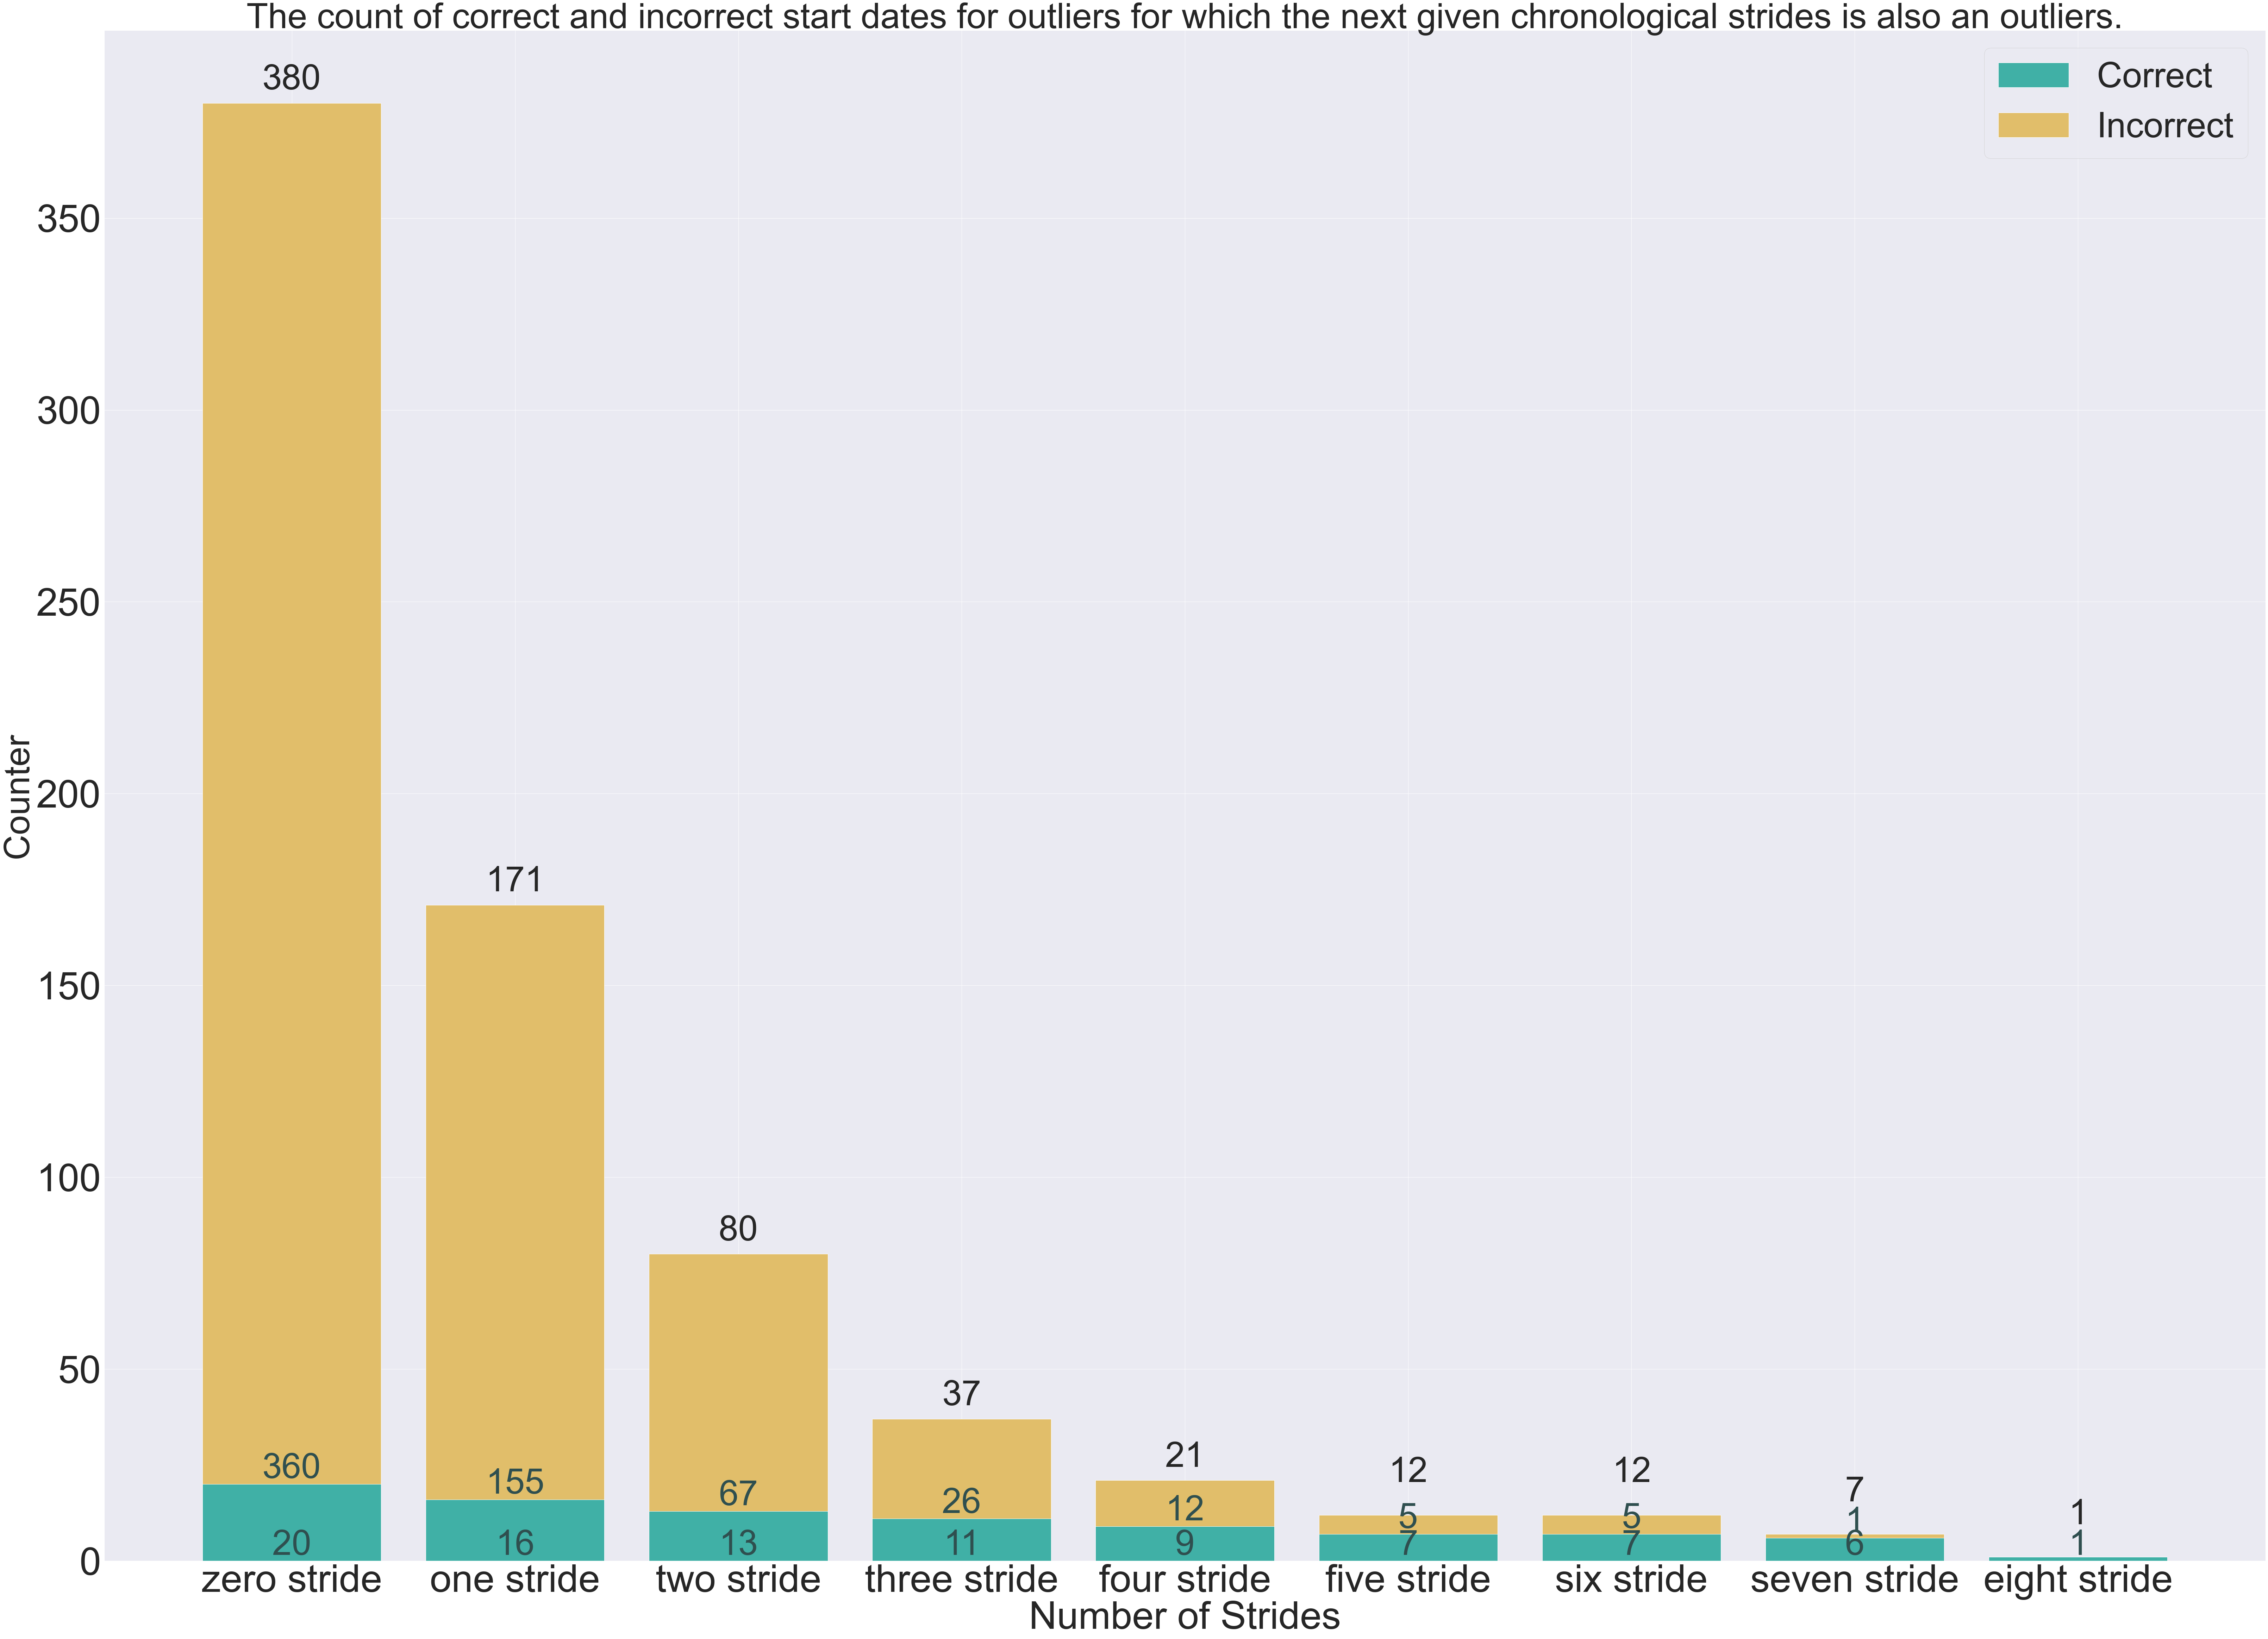

In [174]:
fig, ax = plt.subplots()
x = ['1', '2', '3', '4', '5', '6', '7', '8', '9'  ]
plt.bar(x, correct, color='#40B0A6')
plt.bar(x, incorrect, bottom= correct, color='#E1BE6A')

plt.xlabel("Number of Strides", fontsize=110)
plt.ylabel("Counter",fontsize=100)

sns.set(rc={'figure.figsize':(110,80)})
plt.legend(["Correct", "Incorrect"],fontsize=100)
plt.title("The count of correct and incorrect start dates for different numbers of segments in a row.",fontsize=100)
plt.xticks(fontsize=110)
plt.yticks(fontsize=110)
rects = ax.patches
for rect, c in zip(rects, correct):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, 4, c, ha="center", va="center", fontsize=100, color= "darkslategrey")

for rect, i in zip(rects, incorrect):
    height = rect.get_height()
    if i != 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2, height+4, i, ha="center", va="center", fontsize=100, color = "darkslategrey")
        
for rect, i in zip(rects, total):
    height = rect.get_height()
    if i == 12 or i ==7 or i==1 :
        ax.text(
        rect.get_x() + rect.get_width() / 2, i+11, i, ha="center", va="center", fontsize=100)
    else:
  
        ax.text(
            rect.get_x() + rect.get_width() / 2, i+6, i, ha="center", va="center", fontsize=100)



plt.show
plt.savefig('training_5_stride_bar_graph.png')

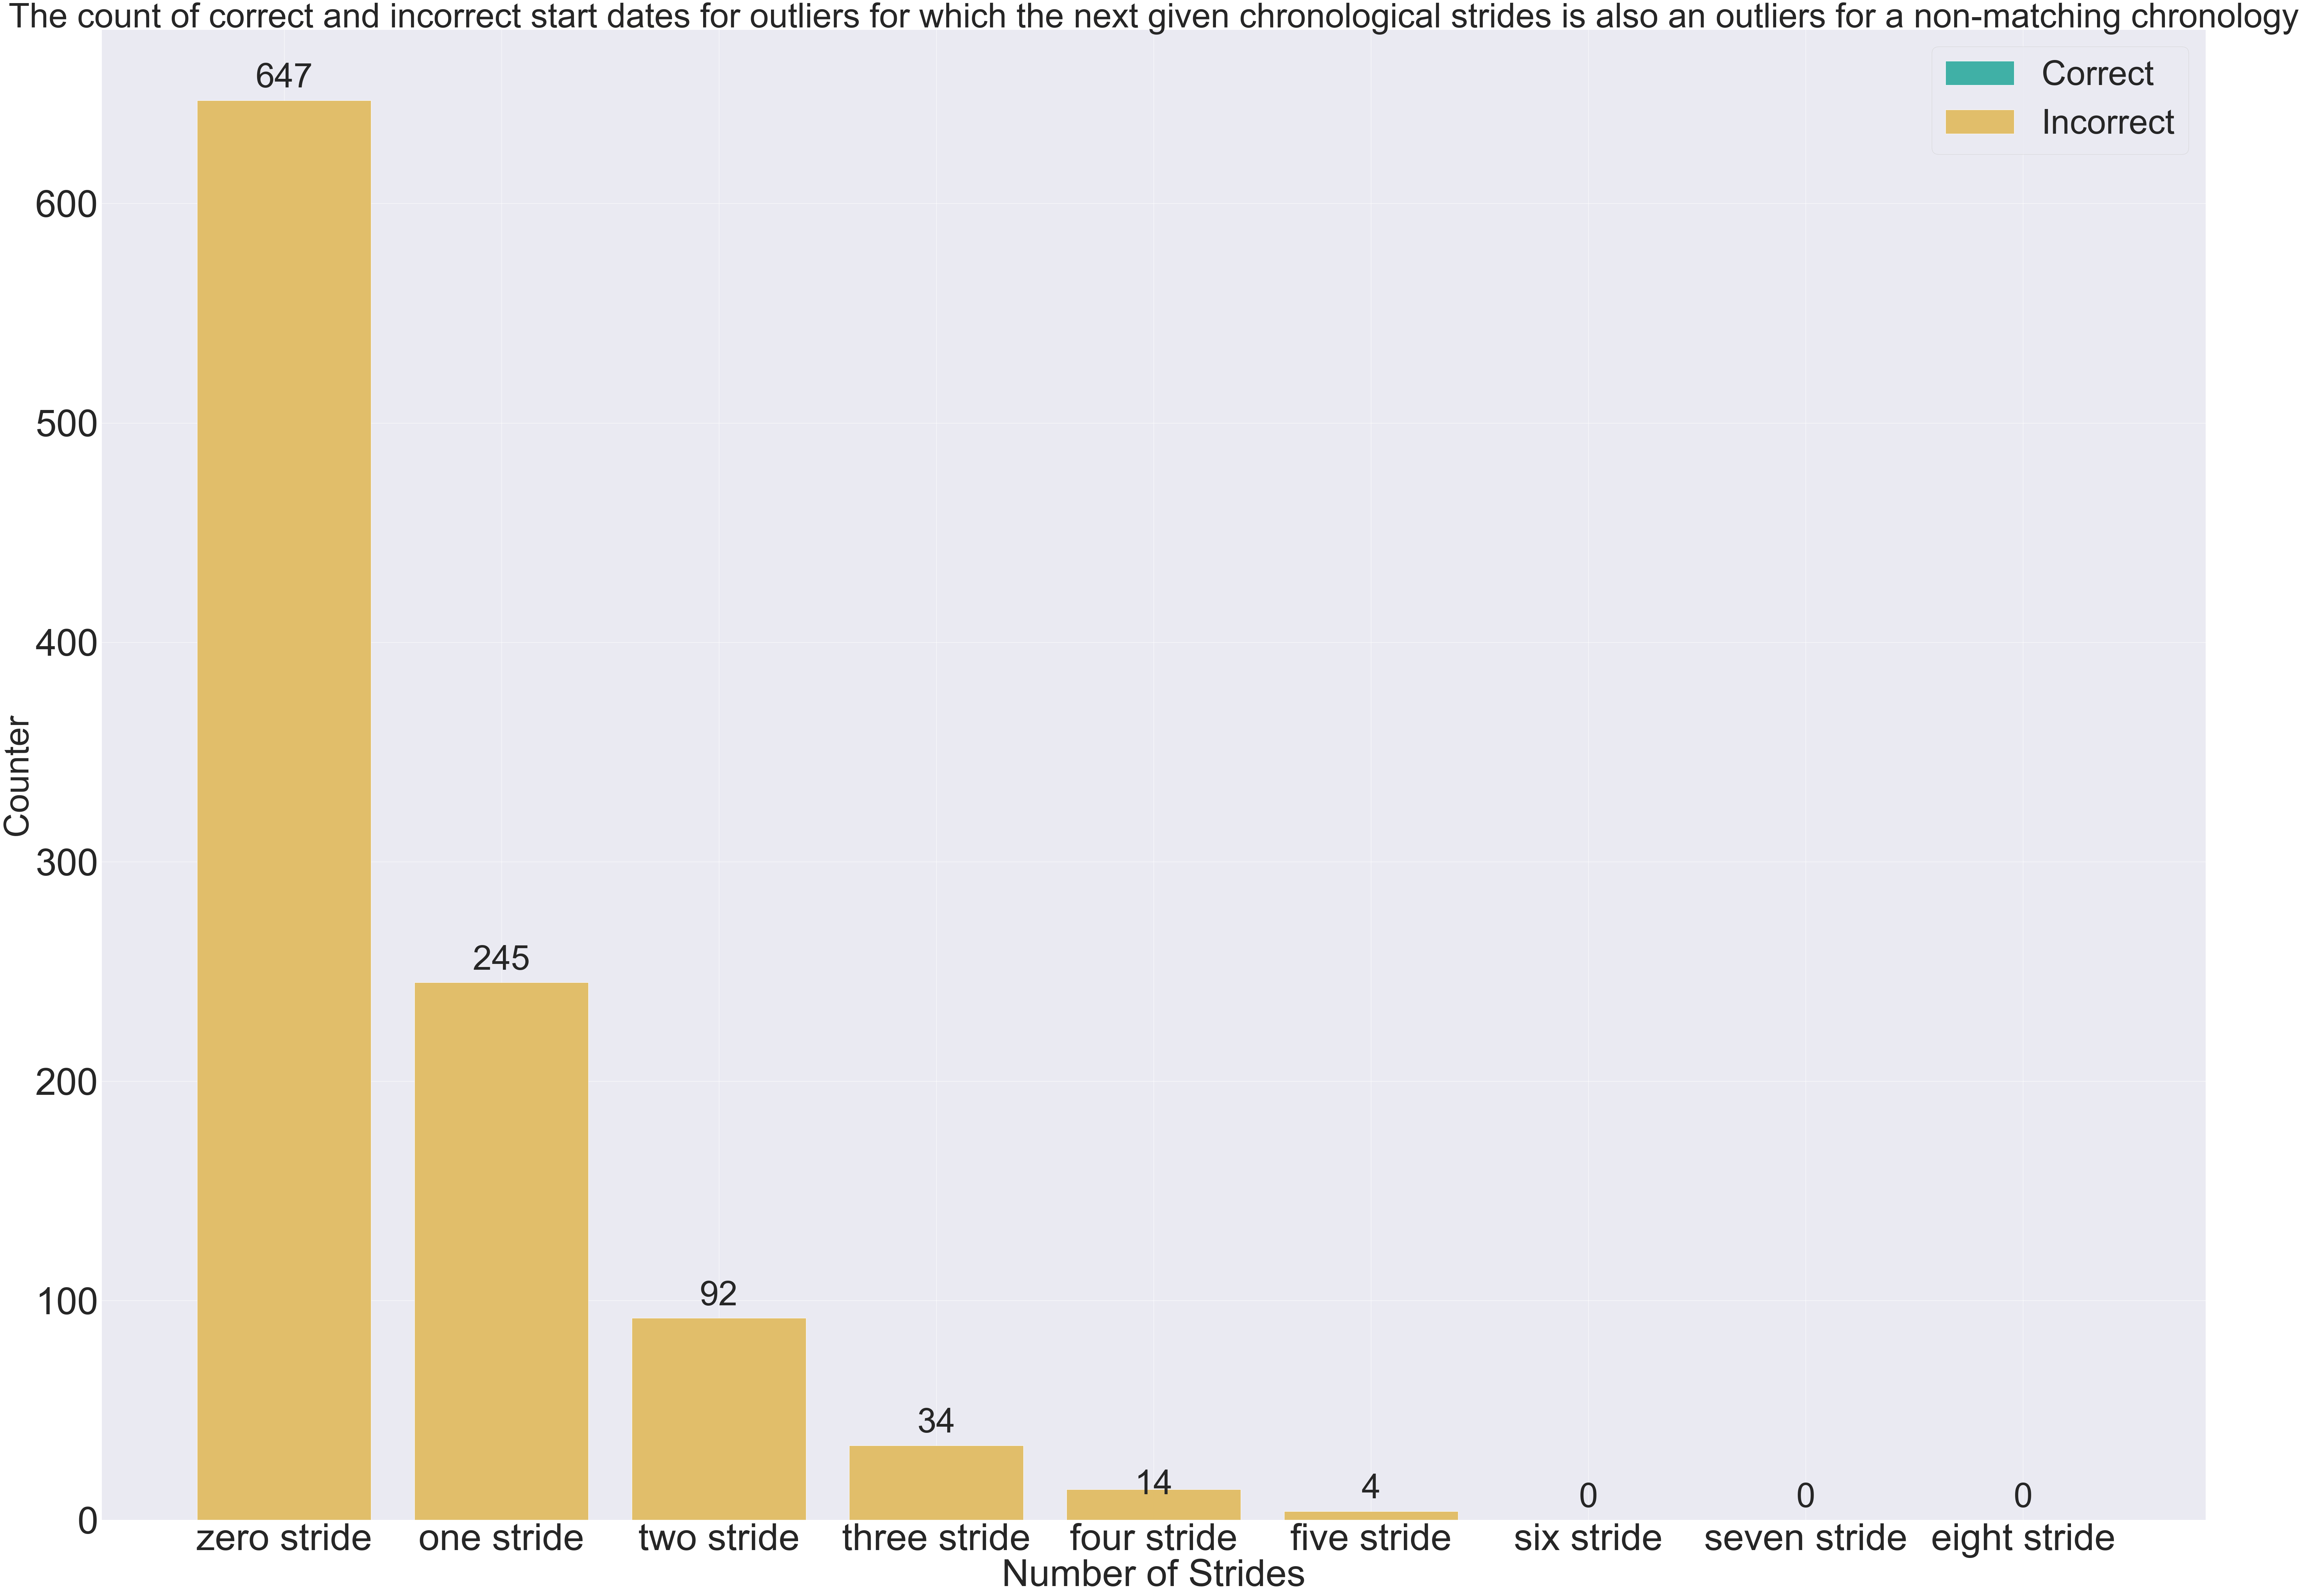

In [49]:
fig, ax = plt.subplots()
x = ['zero stride', 'one stride', 'two stride', 'three stride', 'four stride', 'five stride', 'six stride', 'seven stride', 'eight stride'  ]
plt.bar(x,[0, 0, 0, 0, 0, 0, 0, 0, 0] , color='#40B0A6')
plt.bar(x,[647, 245, 92, 34, 14, 4, 0, 0, 0] , color='#E1BE6A')
plt.xlabel("Number of Strides", fontsize=110)
plt.ylabel("Counter",fontsize=100)
plt.show
sns.set(rc={'figure.figsize':(110,80)})
plt.legend(["Correct", "Incorrect"],fontsize=100)
plt.title("The count of correct and incorrect start dates for outliers for which the next given chronological strides is also an outliers for a non-matching chronology",fontsize=100)
plt.xticks(fontsize=110)
plt.yticks(fontsize=110)
rects = ax.patches

plt.show
plt.savefig('no_match_stride_bar_graph.png')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

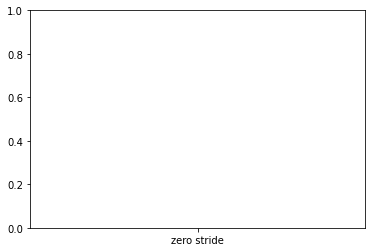

In [153]:
correct = [counter_sample_5_length[1886], counter_sample_10_length[1886], counter_sample_15_length[1886], counter_sample_20_length[1886], counter_sample_25_length[1886], counter_sample_30_length[1886], counter_sample_35_length[1886], counter_sample_40_length[1886]]
total = [correct_count_5_length, correct_count_10_length, correct_count_15_length, correct_count_20_length, correct_count_25_length, correct_count_30_length, correct_count_35_length, correct_count_40_length]
incorrect = [element1 - element2 for (element1, element2) in zip(total, correct)]
print(correct)
print(incorrect)
print(total)

[0, 13, 20, 52, 68, 72, 76, 71]
[8, 54, 66, 72, 67, 63, 56, 43]
[8, 67, 86, 124, 135, 135, 132, 114]


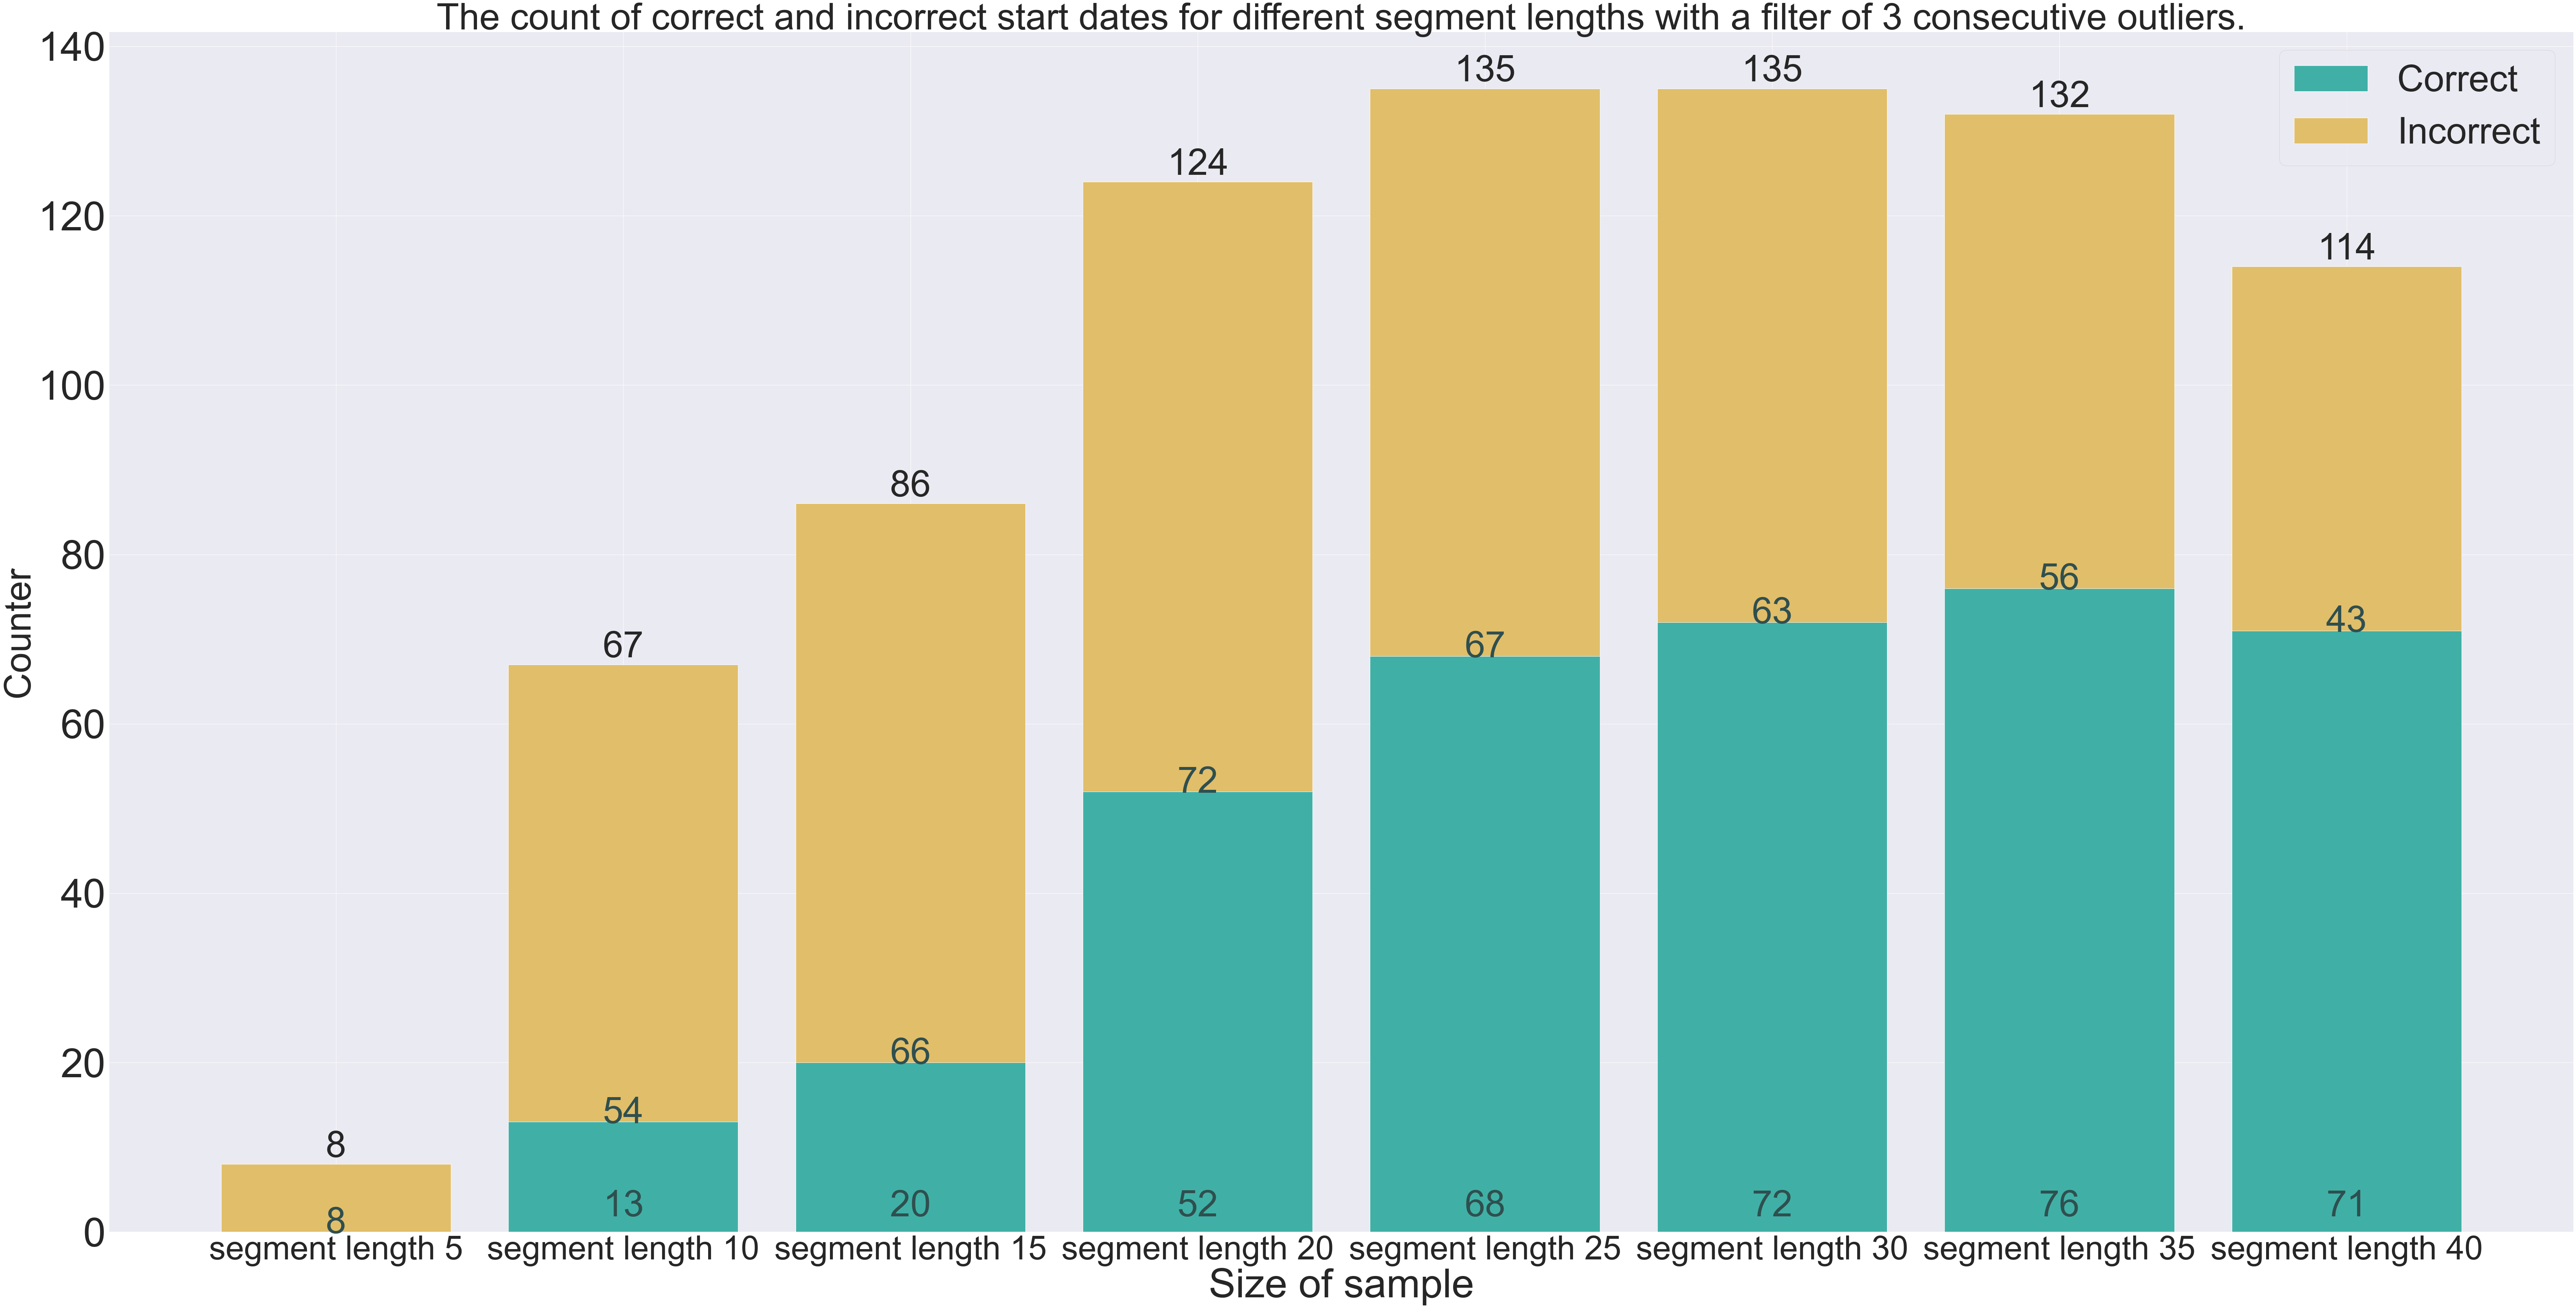

In [156]:
sns.set(rc={'figure.figsize':(120,60)})
fig, ax = plt.subplots()
x = ['segment length 5', 'segment length 10', 'segment length 15', 'segment length 20', 'segment length 25', 'segment length 30', 'segment length 35', 'segment length 40']
plt.bar(x, correct, color='#40B0A6')
plt.bar(x, incorrect, bottom= correct, color='#E1BE6A')

plt.xlabel("Size of sample", fontsize=110)
plt.ylabel("Counter",fontsize=100)

sns.set(rc={'figure.figsize':(110,80)})
plt.legend(["Correct", "Incorrect"],fontsize=100)
plt.title("The count of correct and incorrect start dates for different segment lengths with a filter of 3 consecutive outliers.",fontsize=100)
plt.xticks(fontsize=90)
plt.yticks(fontsize=110)
rects = ax.patches
for rect, c in zip(rects, correct):
    height = rect.get_height()
    if c != 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2, 3, c, ha="center", va="center", fontsize=100, color= "darkslategrey")

for rect, i in zip(rects, incorrect):
    height = rect.get_height()
    if i != 0:
        if i == 2:
             ax.text(
            rect.get_x()+ rect.get_width() / 2, height+5, '', ha="center", va="center", fontsize=100, color = "darkslategrey")
        else:
            ax.text(
                rect.get_x() + rect.get_width() / 2, height+1, i, ha="center", va="center", fontsize=100, color = "darkslategrey")
  
        
        
for rect, i in zip(rects, total):
    height = rect.get_height()
    if i == 828 or i ==6 or i==2 :
        ax.text(
         rect.get_x() + rect.get_width() / 2, i+2, i, ha="center", va="center", fontsize=100)
    else:
  
        ax.text(
            rect.get_x() + rect.get_width() / 2, i+2, i, ha="center", va="center", fontsize=100)



plt.show
plt.savefig('segment_length_filter_3.png')

In [214]:
total = [counter_sample_1_dev, counter_sample_2_dev, counter_sample_3_dev]
correct = [correct_count_1_dev[1886], correct_count_2_dev[1886], correct_count_3_dev[1886]]
incorrect = [element1 - element2 for (element1, element2) in zip(total, correct)]
print(correct)
print(incorrect)
print(total)

[79, 18, 8]
[4246, 54, 3]
[4325, 72, 11]


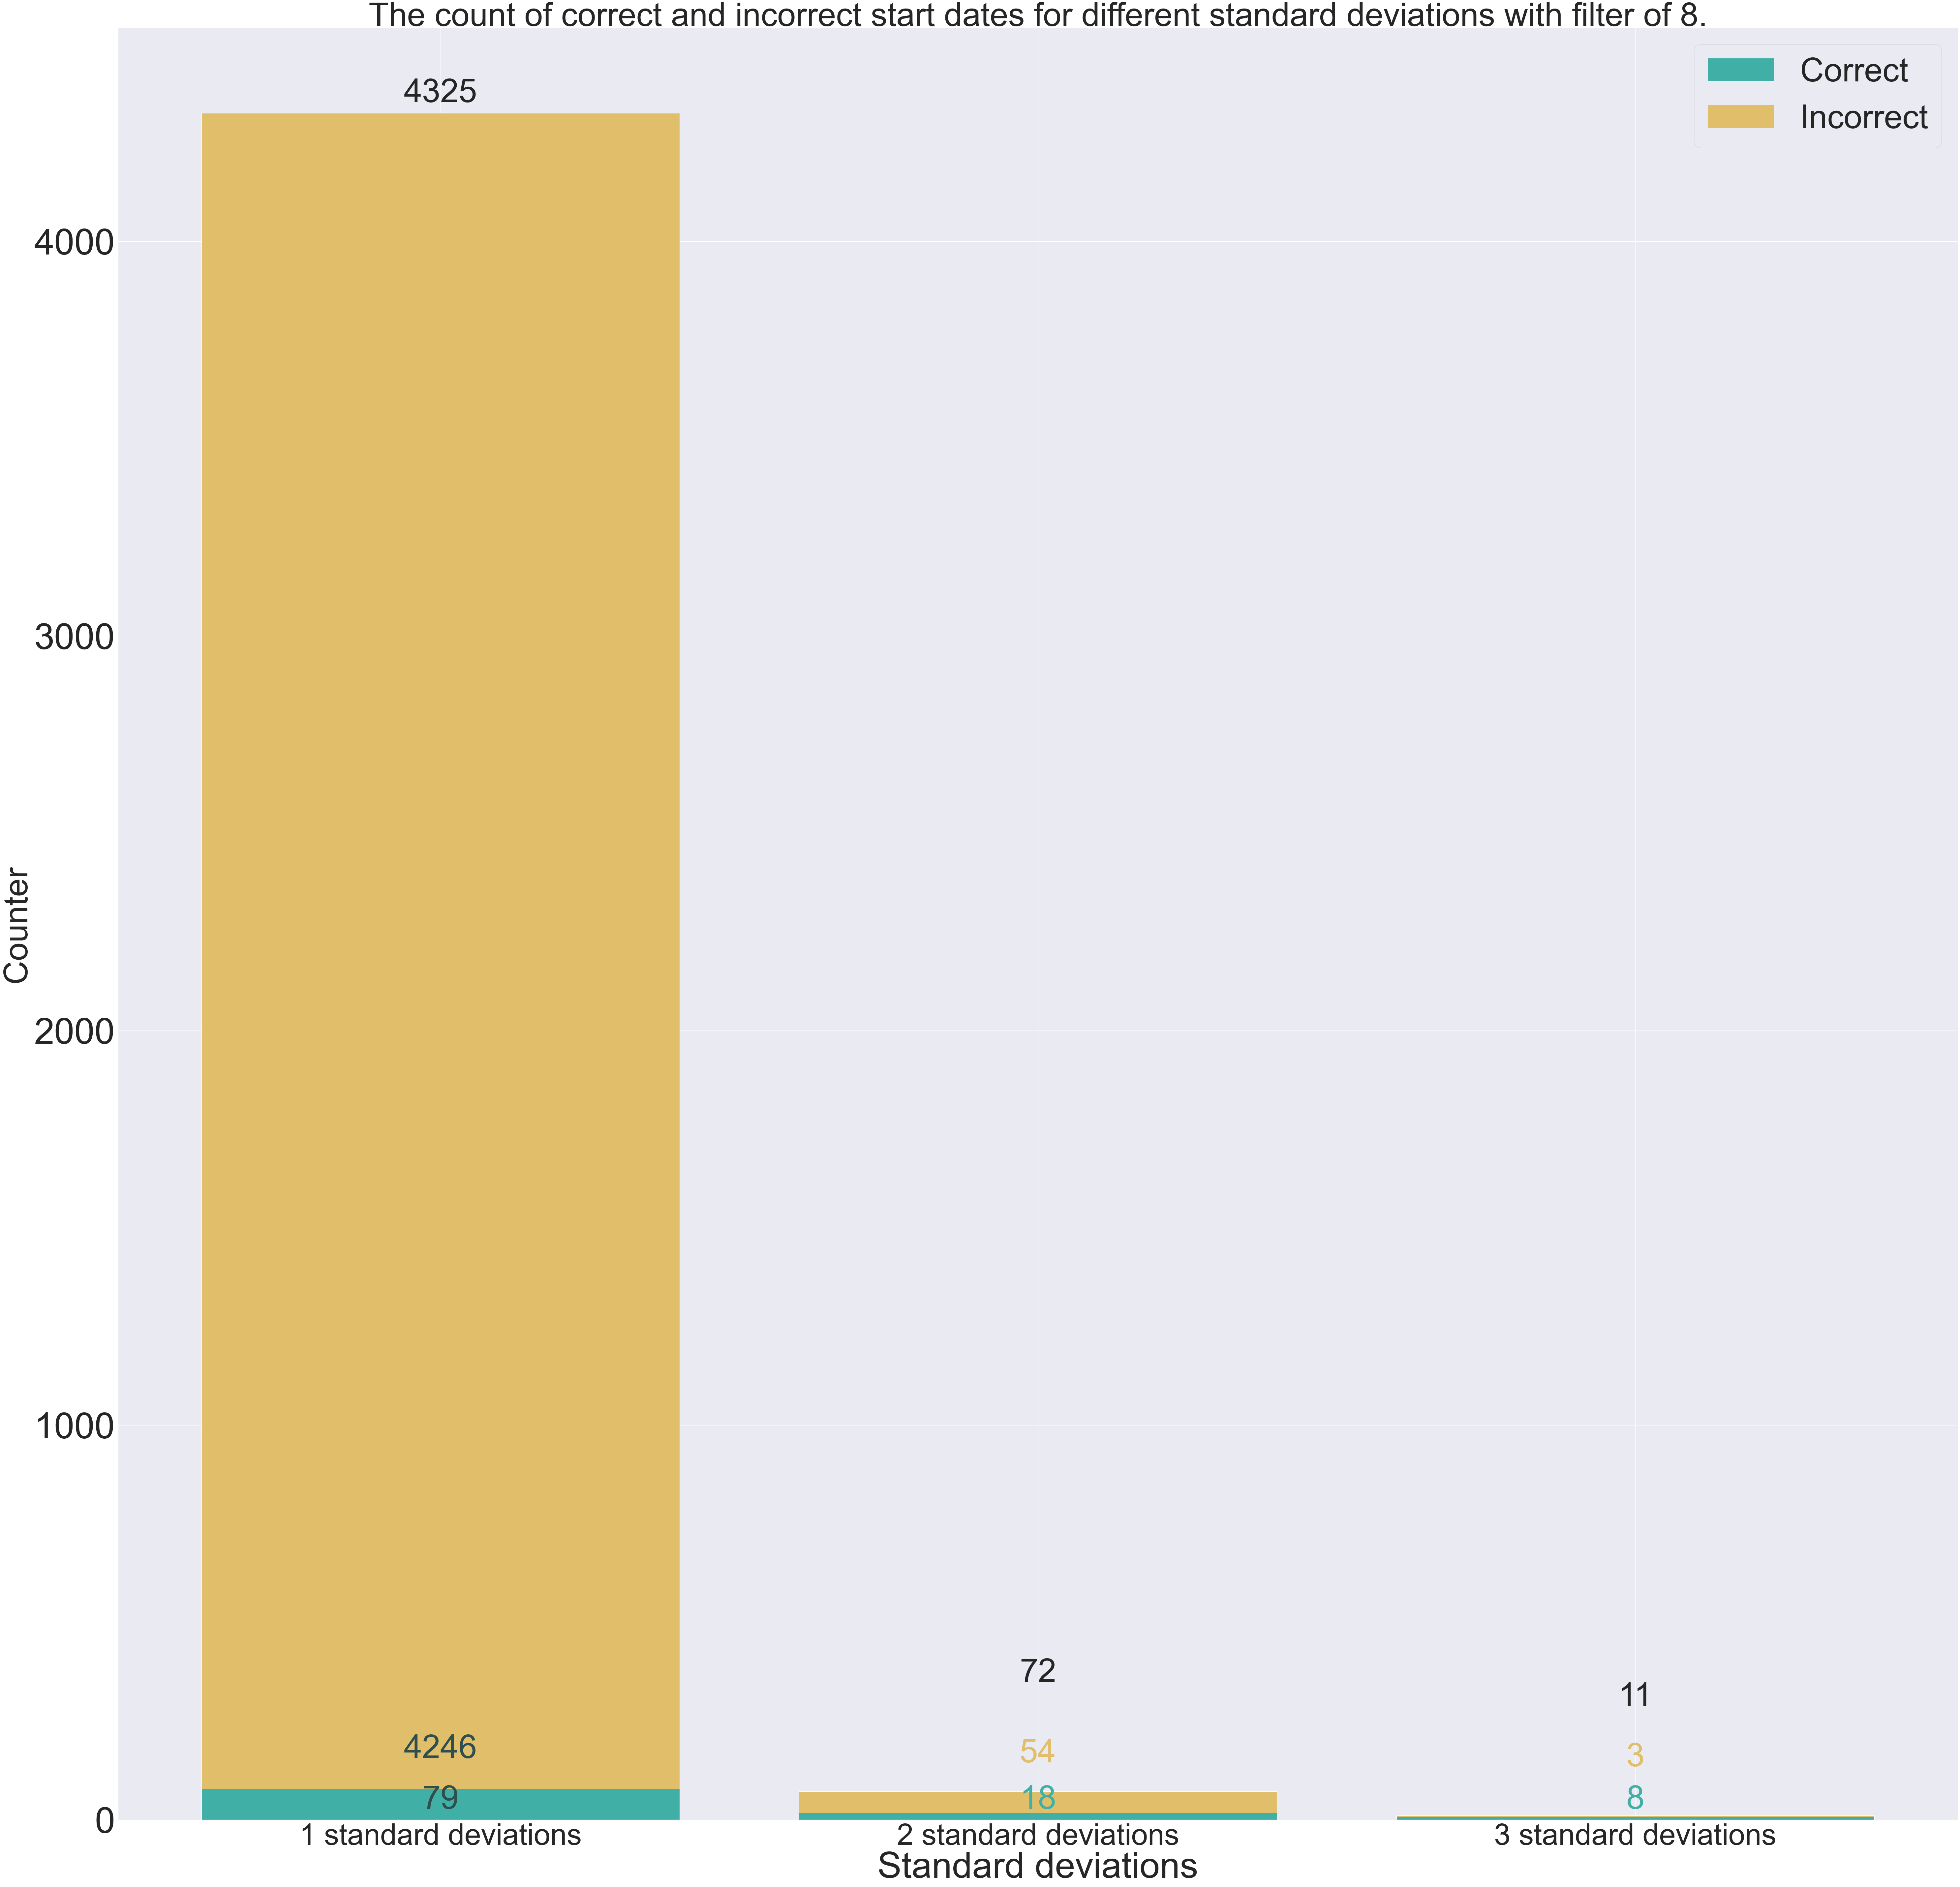

In [224]:
sns.set(rc={'figure.figsize':(100,100)})
fig, ax = plt.subplots()
x = ['1 standard deviations', '2 standard deviations', '3 standard deviations']
plt.bar(x, correct, color='#40B0A6')
plt.bar(x, incorrect, bottom =correct, color='#E1BE6A')

plt.xlabel("Standard deviations", fontsize=110)
plt.ylabel("Counter",fontsize=100)

sns.set(rc={'figure.figsize':(110,80)})
plt.legend(["Correct", "Incorrect"],fontsize=100)
plt.title("The count of correct and incorrect start dates for different standard deviations with filter of 8.",fontsize=100)
plt.xticks(fontsize=90)
plt.yticks(fontsize=110)
rects = ax.patches
for rect, c in zip(rects, correct):
    height = rect.get_height()
    if c == 18 or c ==8 :
         ax.text(
            rect.get_x() + rect.get_width() / 2, 50, c, ha="center", va="center", fontsize=100, color= "#40B0A6")
    elif c != 0:
        ax.text(
            rect.get_x() + rect.get_width() / 2, 50, c, ha="center", va="center", fontsize=100, color= "darkslategrey")
    
for rect, i in zip(rects, incorrect):
    height = rect.get_height()
    if i != 0:
        if i == 4246:
             ax.text(
            rect.get_x()+ rect.get_width() / 2, height+100, i, ha="center", va="center", fontsize=100, color='darkslategrey')
        else:
            ax.text(
                rect.get_x() + rect.get_width() / 2, height+150, i, ha="center", va="center", fontsize=100, color = '#E1BE6A')
  
        
        
for rect, i in zip(rects, total):
    height = rect.get_height()
    if i == 4325 or i==2 :
        ax.text(
         rect.get_x() + rect.get_width() / 2, i+50, i, ha="center", va="center", fontsize=100)
    elif i == 461:
         ax.text(
         rect.get_x() + rect.get_width() / 2, i+150, i, ha="center", va="center", fontsize=100)
    elif i == 1:
         ax.text(
         rect.get_x() + rect.get_width() / 2, i+150, '', ha="center", va="center", fontsize=100)
            
    else:
  
        ax.text(
            rect.get_x() + rect.get_width() / 2, i+300, i, ha="center", va="center", fontsize=100)



plt.show
plt.savefig('standard_deviations_filter_8.png')